# 01 - Airyjevi funkciji
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, oktober 2023 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---



## Uvod

Airyjevi funkciji $\text{Ai}$ in $\text{Bi}$ se v fiziki pojavljata predvsem v optiki in kvantni mehaniki. Definirani sta kot neodvisni rešitvi enačbe

$$   y''(x) -xy(x) = 0, $$ 

ki je znana kot Airyjeva oz. Stokesova enačba. To je najenostavnejša linearna diferencialna enačba drugega reda z obratno točko (tj. točko, kjer se značaj rešitev spremeni iz oscilatornega v eksponentni). Neodvisni rešitvi enačbe sta predstavljivi v integralski obliki kot

$$   \text{Ai}(x) = \frac{1}{\pi} \int_0^\infty \cos (t^3/3 + x t) \,\mathrm{d} t \>,\quad $$ 

$$   \text{Bi}(x) = \frac{1}{\pi} \int_0^\infty \left[ \mathrm{e}^{-t^3/3 + x t}
  + \sin (t^3/3 + x t) \right] \,\mathrm{d} t \>. $$

## Naloga

> Z uporabo kombinacije Maclaurinove vrste in asimptotskega razvoja poišči čim učinkovitejši postopek za izračun
vrednosti Airyjevih funkcij $\text{Ai}$ in $\text{Bi}$ na vsej realni osi
z **absolutno** napako, manjšo od $10^{-10}$. Enako naredi tudi z **relativno** napako in ugotovi,
ali je tudi pri le-tej dosegljiva natančnost, manjša od $10^{-10}$.
Pri oceni napak si pomagaj s programi, ki znajo računati s poljubno
natančnostjo.


## Lastnosti Airyjevih funkcij

Funkciji $\text{Ai}$ in $\text{Bi}$ sta definirani na celotni realni osi. Za vrednosti $ x \in \mathbb{R}^-$ sta obe funkciji oscilatorni in omejeni. Za $ x \in \mathbb{R}^+ \cup \{0\}$ pa je funkcija $\text{Ai}$ omejena, medtem ko $\text{Bi}$ narašča čez vse meje. 


![Airy Functions](./media/airyf.png)
> Graf funkcij $\text{Ai}$ in $\text{Bi}$

### Matematični pristop in potencialne težave

Za izračun vrednosti funkcij integralov ne bomo neposredno izvrednotili, temveč bomo funkcije razvili v Maclaurinovo in asimptotsko vrsto. Pri tem bomo pazili, da formule implementiramo rekurzivno in tako čim bolj zmanjšamo število potrebnih računskih operacij. Na grobo ocenimo, da z uporabo rekurzivnih formul zmanjšamo časovno zahtevnost programa iz $O(n^2)$ na $O(n)$, kar v računalniškem lingu razume kot "iz zelo počasi v precej hitro".

Za natančnost bomo poskrbeli z ustreznim izborom števila členov v Maclaurinovi oz. asimptotski vrsti. Ker ena vrsta podaja dober približek za zelo majhne vrednosti $x$, druga pa za zelo velike, bomo vrste v točkah $x_{-}$ in $x_{+}$ zlepili. Točke bomo določili na podlagi števila členov, ki jih potrebuja ena in druga vrsta za doseganje tolerirane napake.  

Potencialne težave bodo (in tudi so) predstavljale predvsem: omejitve podatkovnega tipa `float`, iskanje zanesljive referenčne vrednosti za oceno napak in iskanje minimuma napake glede na število členov asimptotske vrste.





## Ustreznost referenčne funkcije

Za primerjavo naših vrst z referenčno vrednostjo lahko uporabimo funkciji `mpmath.airyai()` in `mpmath.airybi()` iz Pythonskega paketa `mpmath`. Ker bo to naša osnova za nadaljevanje, je smiselno preveriti, če ti dve funkciji dejansko delujeta pravilno oz. dovolj natančno glede na definicijo Airyjevih funkcij. 

Z uporabo programa `Wolfram Mathematica` numerično integriramo definiciji funkcij $ \text{Ai} $ in $ \text{Bi} $ v nekaj testnih točkah s sledečimi nastavitvami:

```

xValues = Table[x, {x, -5, 15, 1}]; 
results = {};

integrandA[t_, x_] := Cos[t^3/3 + x*t];
integrandB[t_, x_] := Exp[-t^3/3 + x*t] + Sin[t^3/3 + x*t];

For[i = 1, i <= Length[xValues], i++, x = xValues[[i]];
 resultA = 
  NIntegrate[integrandA[t, x], {t, 0, Infinity}, PrecisionGoal -> 22, 
   AccuracyGoal -> 22, WorkingPrecision -> 60];
 resultB = 
  NIntegrate[integrandB[t, x], {t, 0, Infinity}, PrecisionGoal -> 22, 
   AccuracyGoal -> 22, WorkingPrecision -> 60];
 results = AppendTo[results, {x, resultA / Pi, resultB / Pi}];]

xValues = Table[x, {x, 15, 22, 1}]; 

For[i = 1, i <= Length[xValues], i++, x = xValues[[i]];
 resultA = 
  NIntegrate[integrandA[t, x], {t, 0, Infinity}, PrecisionGoal -> 20, 
   AccuracyGoal -> 20, WorkingPrecision -> 60];
 resultB = 
  NIntegrate[integrandB[t, x], {t, 0, Infinity}, PrecisionGoal -> 30, 
   AccuracyGoal -> 30, WorkingPrecision -> 60];
 results = AppendTo[results, {x, resultA / Pi, resultB / Pi}];]

```

Rezultate primarjamo s funkcijama `mpmath.airyai()` in `mpmath.airybi()`, ki ju prav tako nastavimo na 60 decimalk.

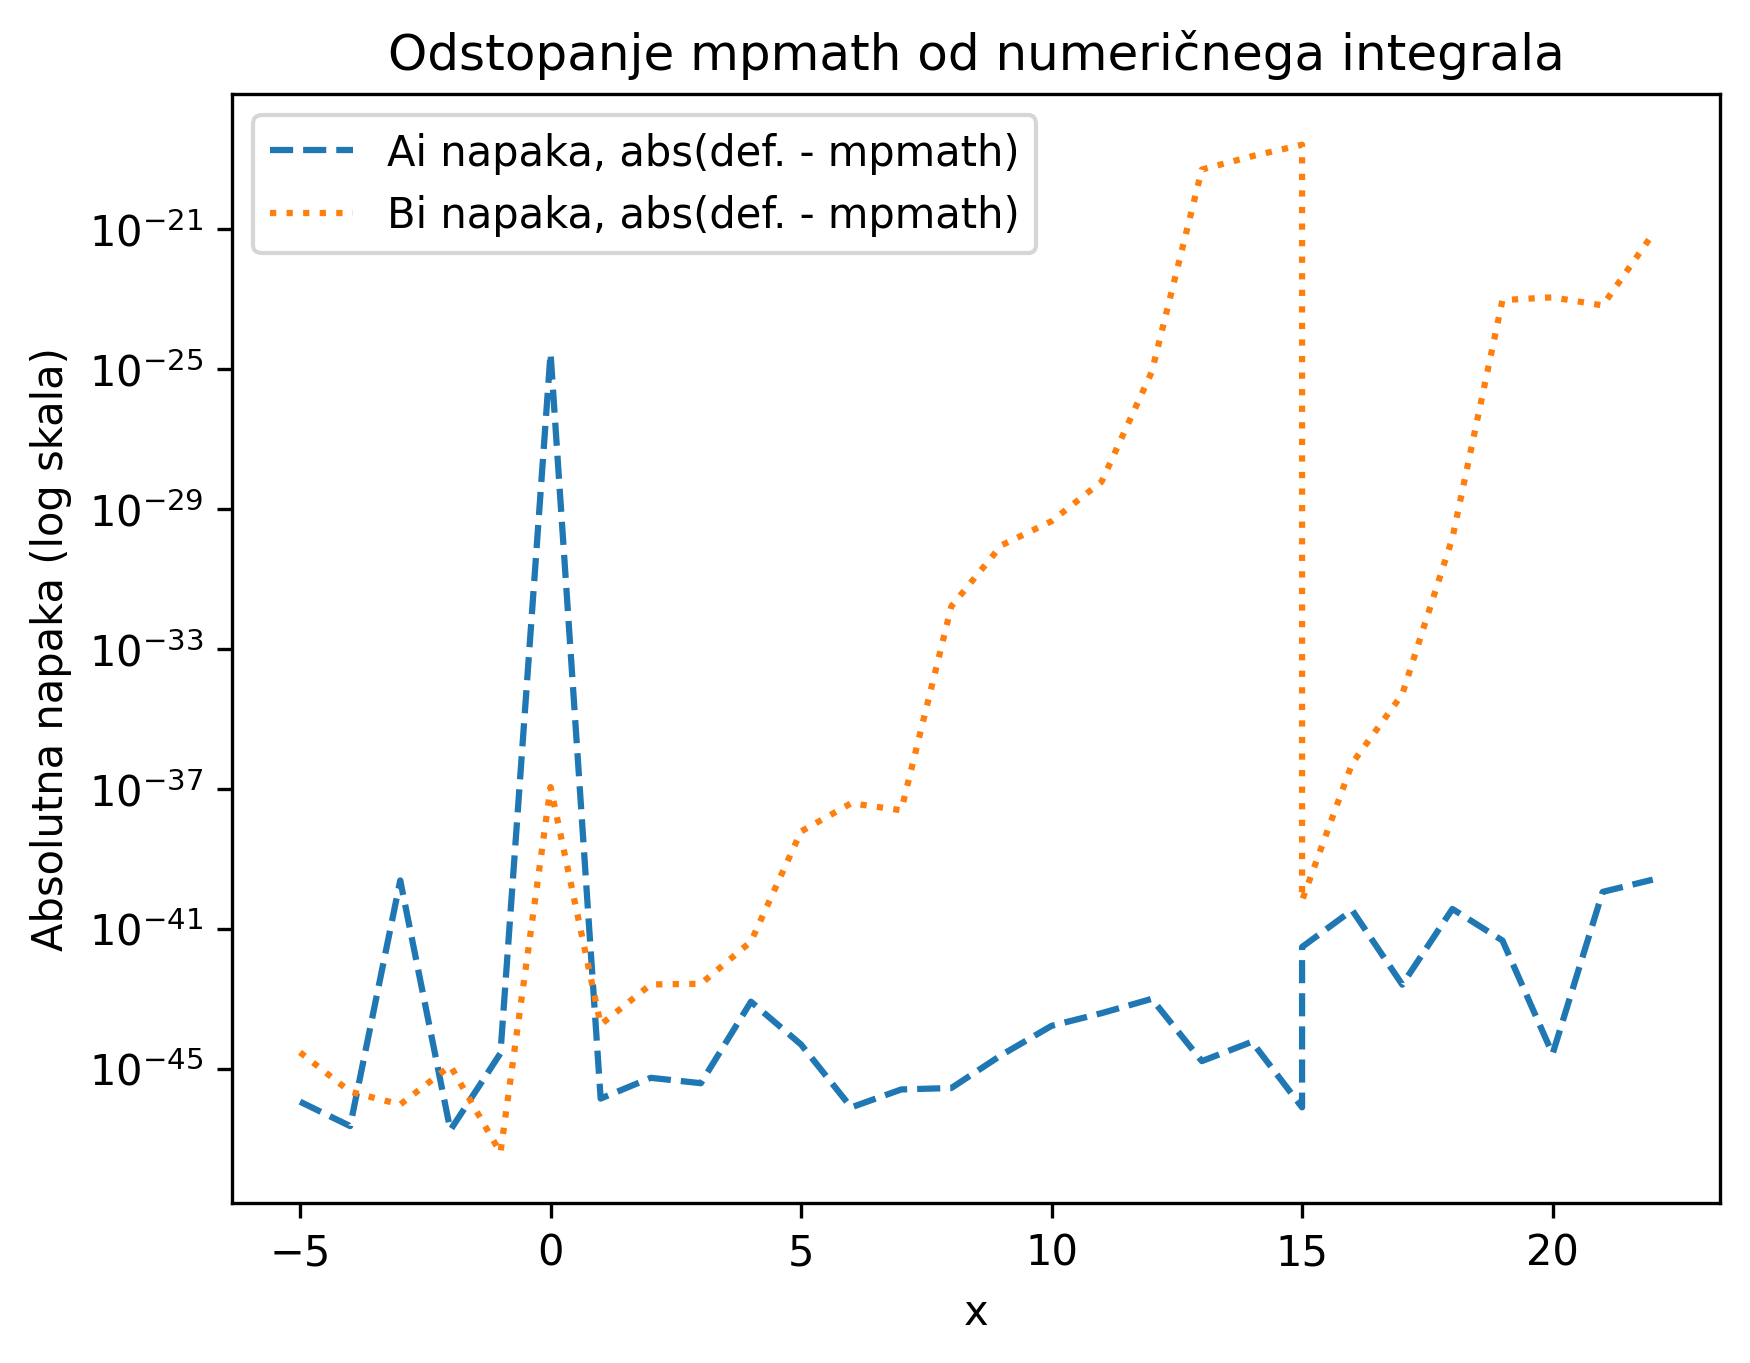

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

mp.dps = 60
plt.rcParams['figure.dpi'] = 300

imported_df = pd.read_csv('./mathematica/all_nint.csv', dtype={'x': int, 'Ai': str, 'Bi': str})
abs_error_Ai = mp.matrix(1, imported_df.shape[0])
abs_error_Bi = mp.matrix(1, imported_df.shape[0])

for i,x in enumerate(imported_df['x']):
    x_mp = mp.mpf(x)
    abs_error_Ai[i] = np.abs(mp.airyai(x_mp) - mp.mpf(imported_df['Ai'][i]))
    abs_error_Bi[i] = np.abs(mp.airybi(x_mp) - mp.mpf(imported_df['Bi'][i]))


plt.plot(imported_df['x'], abs_error_Ai, label='Ai napaka, abs(def. - mpmath)', linestyle='--')
plt.plot(imported_df['x'], abs_error_Bi, label='Bi napaka, abs(def. - mpmath)', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('Absolutna napaka (log skala)')
plt.title('Odstopanje mpmath od numeričnega integrala')
plt.yscale('log')
plt.legend()
plt.show()


> **Odstopanje mpmath od numeričnega integrala**: Primerjanih skupno 27 točk. Pri $x=15$ povečamo Precision in AccuracyGoal. Izkaže se, da je v Mathematici dobro targetirati PrecisionGoal in AccuracyGoal vsaj 5 redov višje, saj napaka v primerjavi pada.

Iz grafa razberemo, da `mpmath.airyai()` in `mpmath.airybi()` odstopada od *dovolj natančno* izračunanega integrala za manj kot $10^{-10}$. Torej lahko za primerjavo napak uporabimo kar ti dve funkciji, saj delujeta bistveno hitreje od numerične integracije.

## Maclaurinov približek

Za majhne $x$ lahko funkciji $\text{Ai}$ in $\text{Bi}$ izrazimo z Maclaurinovima vrstama

$$ \text{Ai}(x) = \alpha f(x) - \beta g(x) $$

$$   \text{Bi}(x) = \sqrt{3}\, \Bigl[\alpha f (x) + \beta g(x) \Bigr] $$
kjer v $x=0$ velja
$\alpha = \text{Ai}(0) \approx 0.3550...$ in $\beta = -\text{Ai}'(0) \approx 0.2588...$ Vrsti za $f$ in $g$ zapišemo rekurzivno in $n$-ti člen izračunamo kot produkt prejšnjega člena in količnika:

$$ f_{n} = f_{n-1} \cdot \frac{f_n}{f_{n-1}} = f_{n-1} \cdot \frac{x^3}{(3n - 1)\, 3n}, \quad f_0 = 1$$
$$ g_{n} = g_{n-1} \cdot \frac{g_n}{g_{n-1}} = g_{n-1} \cdot \frac{x^3}{(3n + 1)\, 3n}, \quad g_0 = x$$


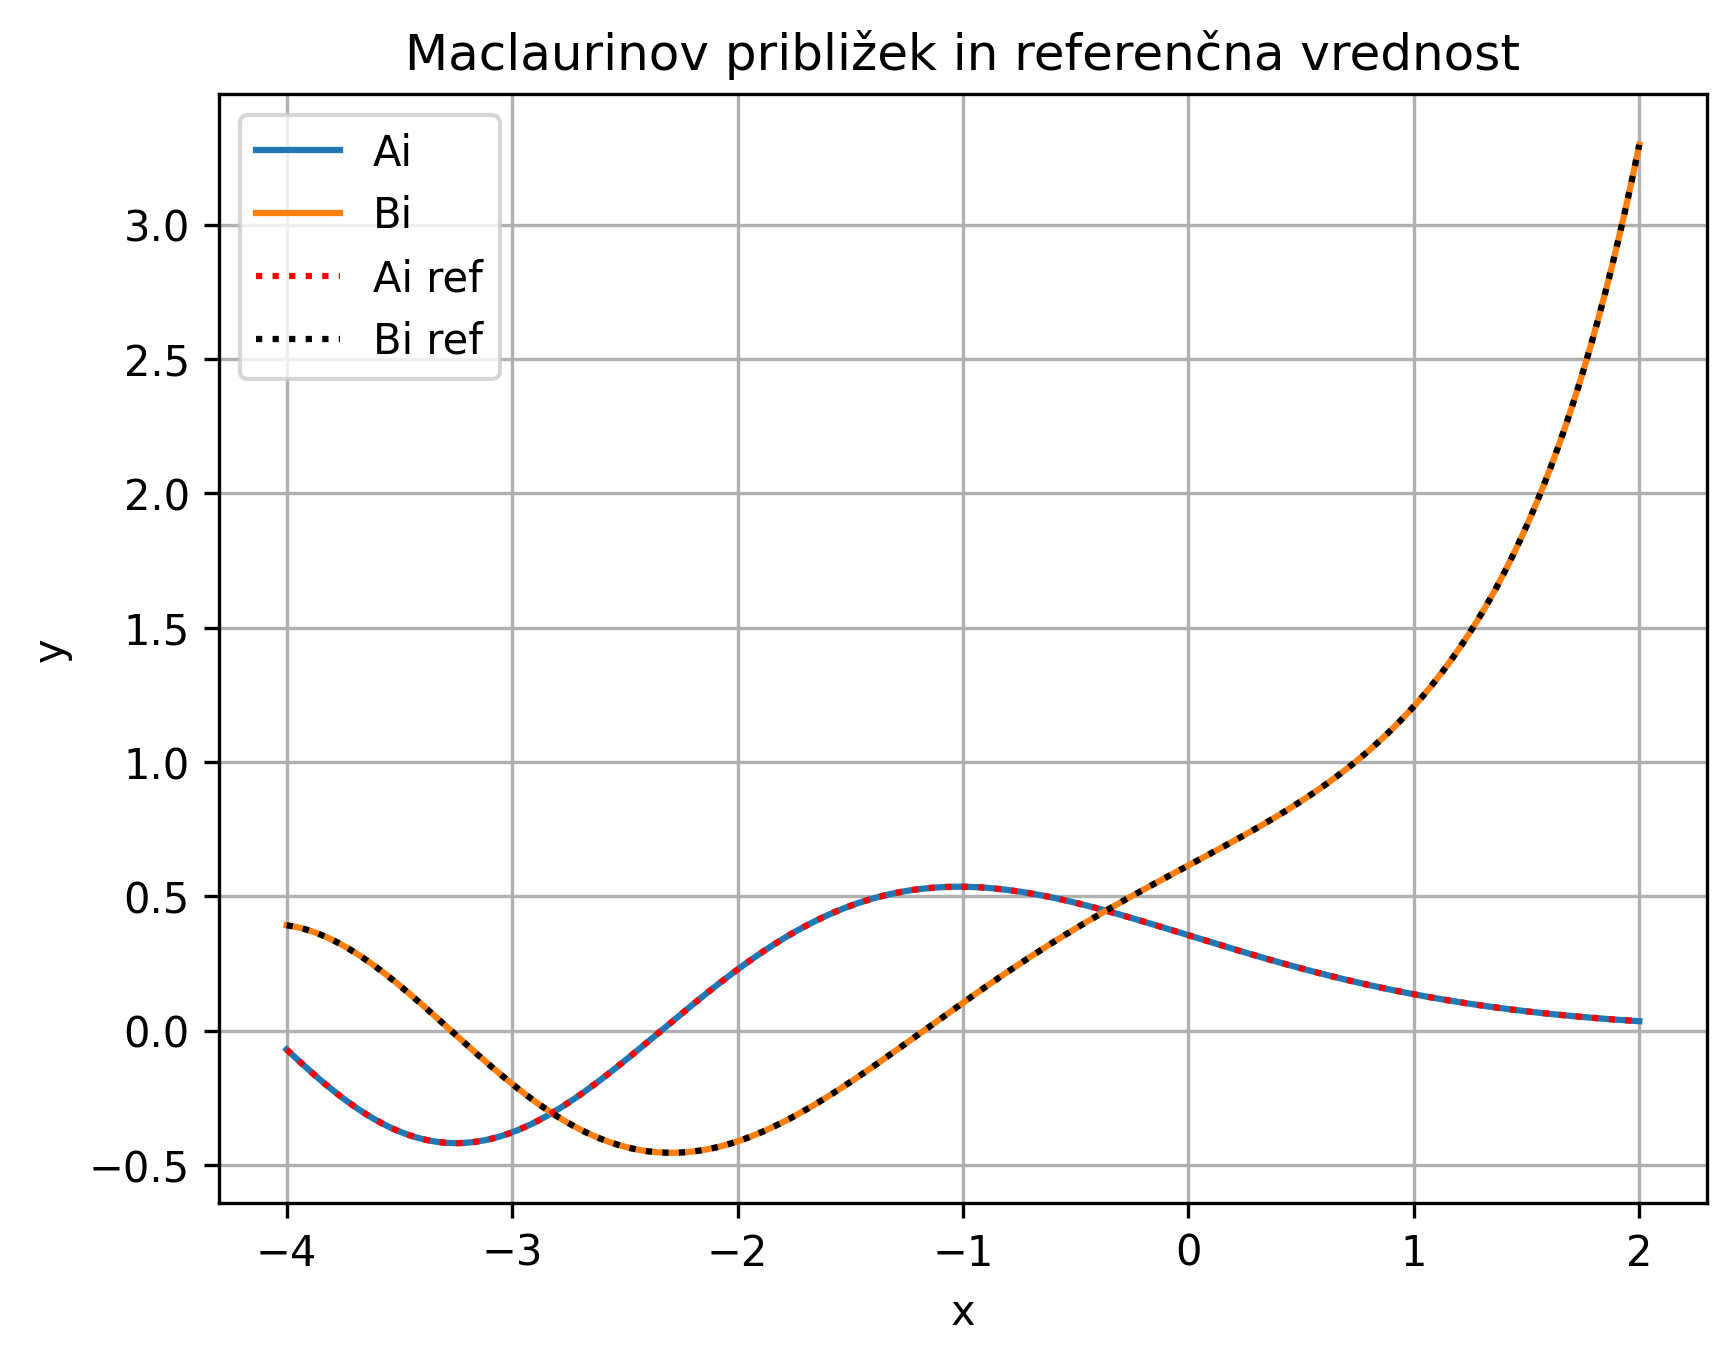

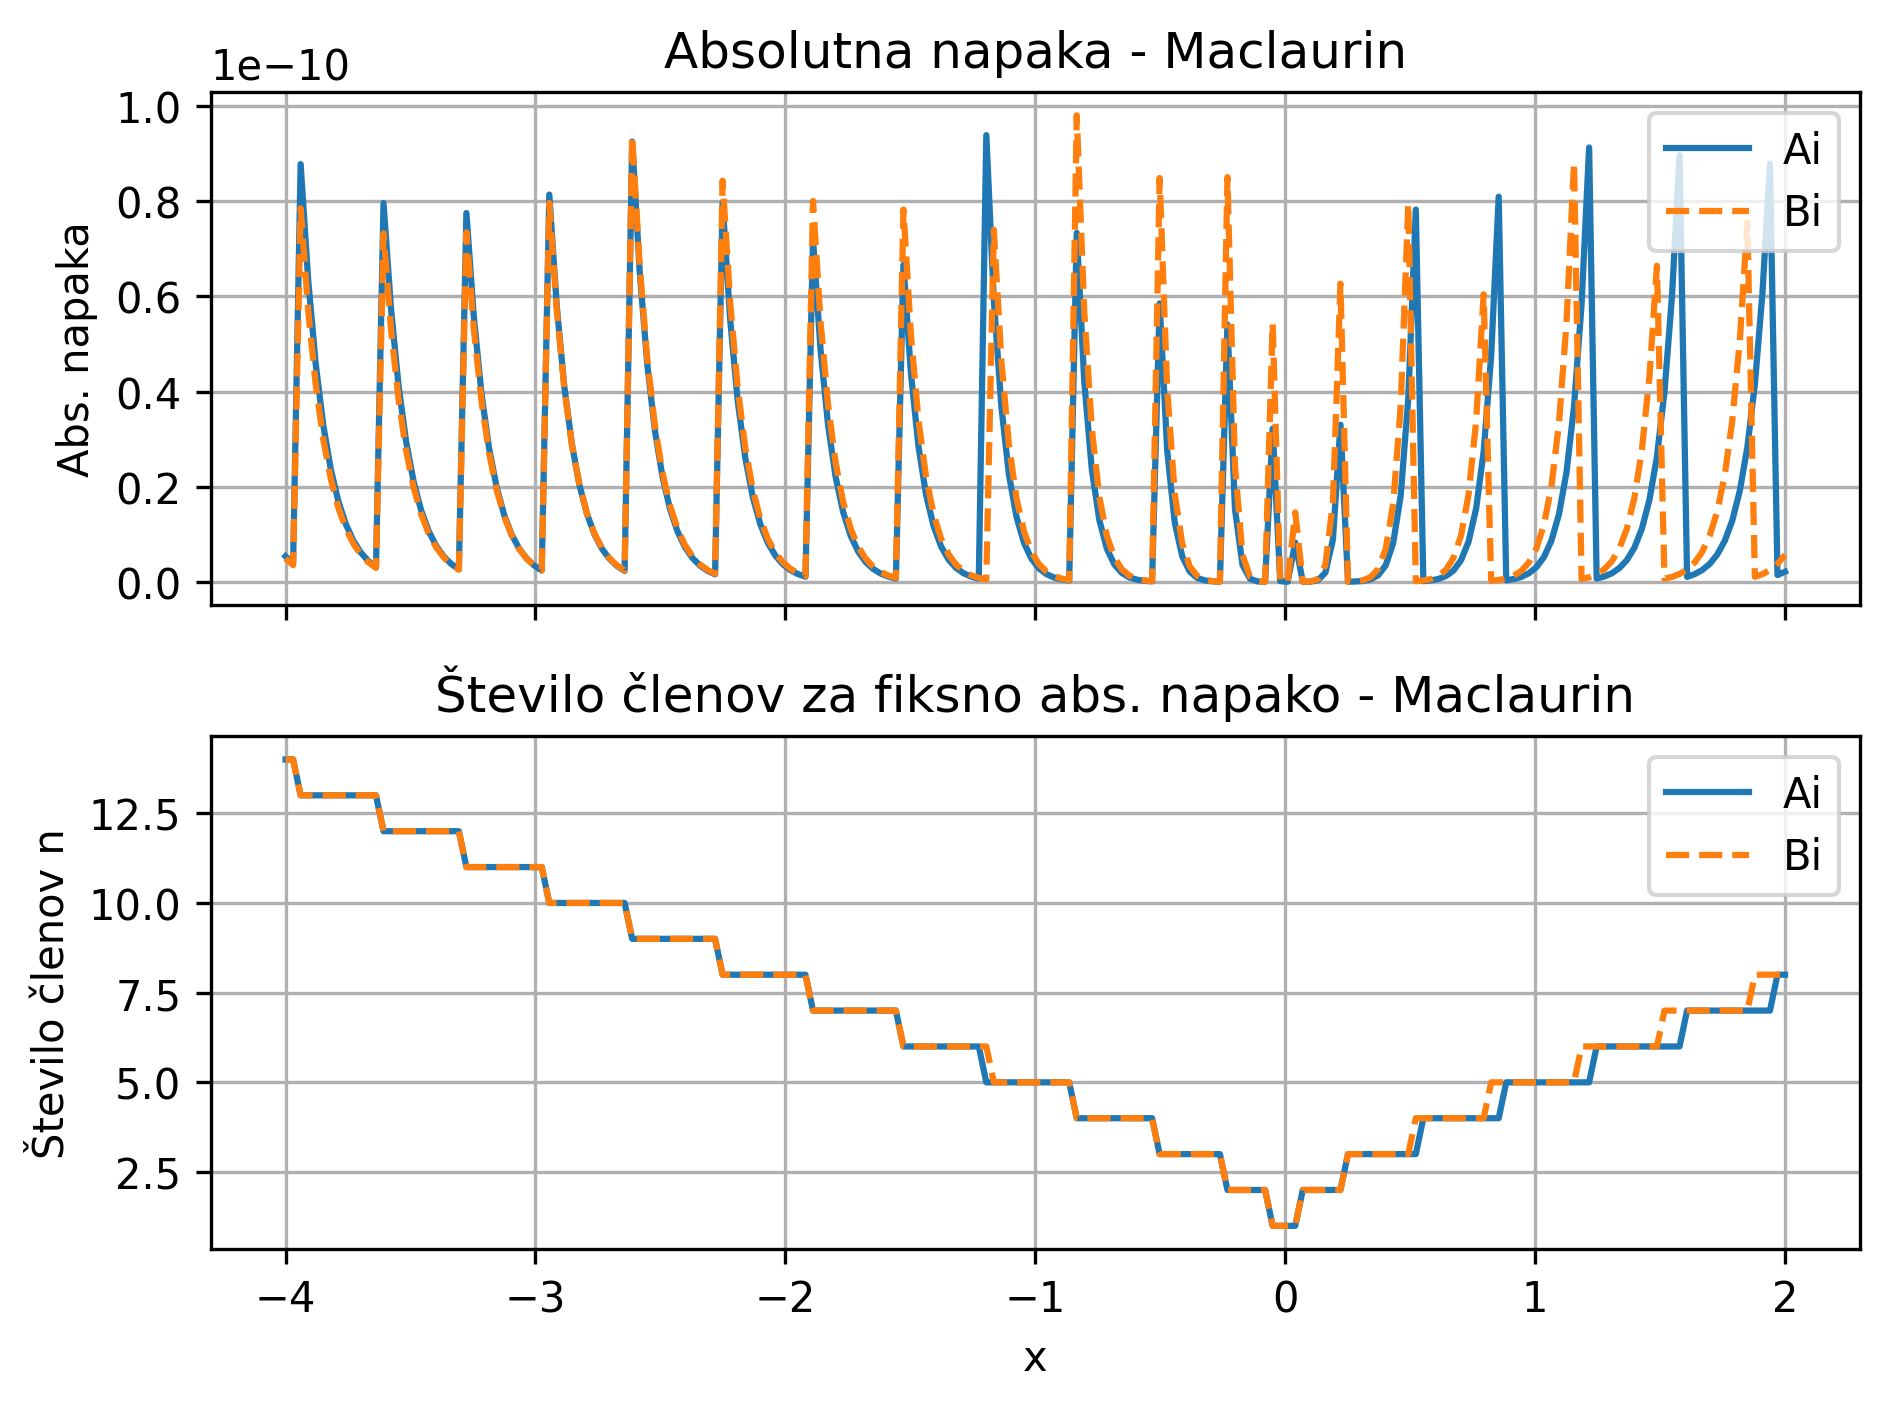

In [26]:
import fastAiry as fa

mp.dps = 30
precision = fa.c(1e-10)

def ai(x, n):
    return fa.airy_mac(x, n)[0]
def bi(x, n):
    return fa.airy_mac(x, n)[1]


x_range = np.linspace(-4, 2, 200)
A_i_ref = mp.matrix(1, x_range.shape[0])
B_i_ref = mp.matrix(1, x_range.shape[0])
A_i = mp.matrix(1, x_range.shape[0])
B_i = mp.matrix(1, x_range.shape[0])
A_i_n = mp.matrix(1, x_range.shape[0])
B_i_n = mp.matrix(1, x_range.shape[0])


for i,x in enumerate(x_range):
    x_mp = fa.c(x)
    A_i_ref[i] = mp.airyai(x_mp)
    B_i_ref[i] = mp.airybi(x_mp)
    A_i[i], A_i_n[i] = fa.optimize(x_mp, ai, A_i_ref[i], precision)
    B_i[i], B_i_n[i] = fa.optimize(x_mp, bi, B_i_ref[i], precision)

plt.plot(x_range, A_i, label='Ai')
plt.plot(x_range, B_i, label='Bi')
plt.plot(x_range, A_i_ref, label='Ai ref', linestyle='dotted', color='red',)
plt.plot(x_range, B_i_ref, label='Bi ref', linestyle='dotted', color='black')
plt.title('Maclaurinov približek in referenčna vrednost')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Absolutna napaka - Maclaurin')
ax1.plot(x_range, np.abs(A_i_ref - A_i), label='Ai')
ax1.plot(x_range, np.abs(B_i_ref - B_i), label='Bi', linestyle='--')
ax1.set_ylabel('Abs. napaka')
ax1.grid()
ax1.legend()

# Plot the second graph on the bottom subplot
ax2.set_title('Število členov za fiksno abs. napako - Maclaurin')
ax2.plot(x_range, A_i_n, label='Ai')
ax2.plot(x_range, B_i_n, label='Bi', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Število členov n')
ax2.grid()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


> **Absolutna napaka:** Iz grafov lahko opazimo, da absolutna napaka narašča z večanjem absolutne vrednosti $x$. Tik preden bi presegla mejo $10^{-10}$, se vrsti doda še en člen, ki napako zopet zmanjša. 

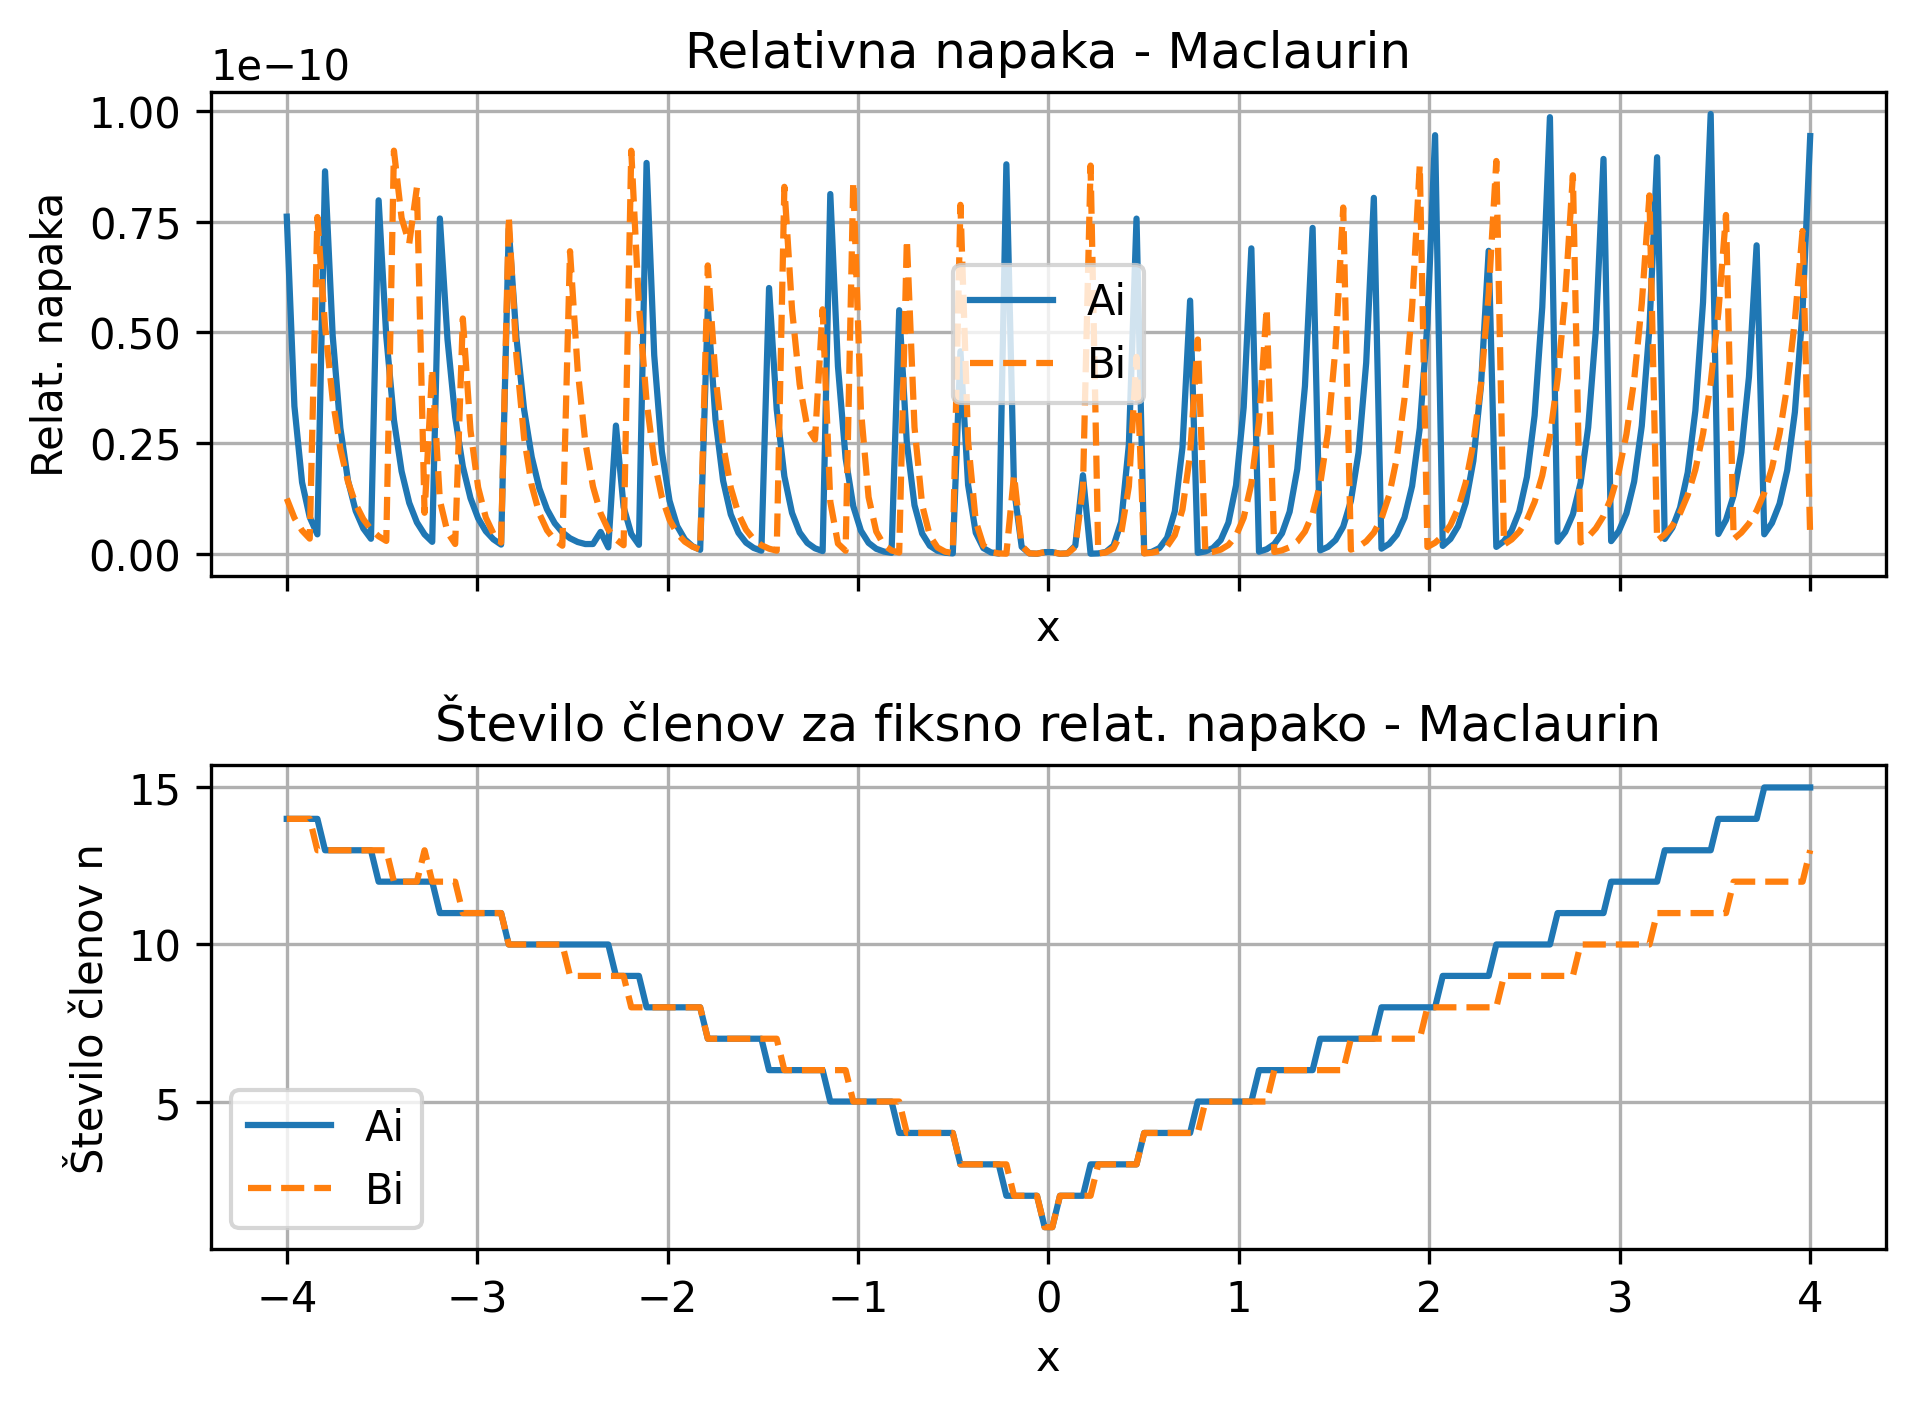

In [27]:

precision = fa.c(1e-10)

x_range = np.linspace(-4, 4, 200)
A_i_ref = mp.matrix(1, x_range.shape[0])
B_i_ref = mp.matrix(1, x_range.shape[0])
A_i = mp.matrix(1, x_range.shape[0])
B_i = mp.matrix(1, x_range.shape[0])
A_i_n = mp.matrix(1, x_range.shape[0])
B_i_n = mp.matrix(1, x_range.shape[0])


for i,x in enumerate(x_range):
    x_mp = fa.c(x)
    A_i_ref[i] = mp.airyai(x_mp)
    B_i_ref[i] = mp.airybi(x_mp)
    A_i[i], A_i_n[i] = fa.optimize_relative(x_mp, ai, A_i_ref[i], precision)
    B_i[i], B_i_n[i] = fa.optimize_relative(x_mp, bi, B_i_ref[i], precision)



# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Relativna napaka - Maclaurin')
ax1.plot(x_range, np.abs(np.abs(A_i - A_i_ref) / A_i_ref), label='Ai')
ax1.plot(x_range, np.abs(np.abs(B_i - B_i_ref) / B_i_ref), label='Bi', linestyle='--')
ax1.set_xlabel('x')
ax1.set_ylabel('Relat. napaka')
ax1.grid()
ax1.legend()

# Plot the second graph on the bottom subplot
ax2.set_title('Število členov za fiksno relat. napako - Maclaurin')
ax2.plot(x_range, A_i_n, label='Ai')
ax2.plot(x_range, B_i_n, label='Bi', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Število členov n')
ax2.grid()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


> **Relativna napaka:** Tudi tukaj opazimo podobno stvar. Tik preden bi relativna napaka presegla mejo $10^{-10}$, se vrsti doda še en člen, ki napako zopet zmanjša. 

## Asimptotski približek

Asimptotska vrsta lahko divergira ali konvergira. Napaka, ki jo naredimo pri krajšanju vrste za fiksen $x$ pri redu $n$ se ne zmanjšuje z večanjem reda $n$, kar pomeni, da se točki $x < \infty$ ne moremo poljubno približati z večanjem števila členov. Napaka se zmanjšuje proti nič šele, ko pri fiksnem $n$ povečujemo $x \rightarrow \infty$. 

Za velike vrednosti $|x|$ Airyjevi funkciji aproksimiramo z njunima asimptotskima razvojema. Z novo spremenljivko $\xi=\frac{2}{3} |x|^{3/2}$ in asimptotskimi vrstami

$$
  L(z) \sim \sum_{s=0}^\infty \frac{u_s}{z^s},\quad
  P(z) \sim \sum_{s=0}^\infty (-1)^s \frac{u_{2s}}{z^{2 s}},\quad
  Q(z) \sim \sum_{s=0}^\infty (-1)^s \frac{u_{2s+1}}{z^{2 s+1}},
$$ 

s koeficienti

$$
\begin{equation*}
u_s = \frac{ \Gamma(3s + \frac{1}{2})}
        {54^s s!\, \Gamma(s + \frac{1}{2}) }.
\end{equation*}
$$

Za velike pozitivne $x$ izrazimo
$$
\begin{equation*}
\text{Ai}(x)\sim  \frac{\mathrm{e}^{-\xi}}{2\sqrt{\pi} x^{1/4}} \, L(-\xi) \>, \quad
\text{Bi}(x)\sim  \frac{\mathrm{e}^{\xi}} { \sqrt{\pi} x^{1/4}} \, L(\xi)\>,
\end{equation*}
$$
za po absolutni vrednosti velike negativne $x$ pa
$$

\begin{align*}
    \text{Ai}(x)&\sim  \frac{1}{\sqrt{\pi} (-x)^{1/4}}
    \Bigl[ \phantom{-}\sin(\xi-\pi/4) \, Q(\xi)
                    + \cos(\xi-\pi/4) \, P(\xi)\Bigr] \>, \\
    \text{Bi}(x)&\sim  \frac{1}{\sqrt{\pi} (-x)^{1/4}}
    \Bigl[ - \sin(\xi-\pi/4) \, P(\xi)
      + \cos(\xi-\pi/4) \, Q(\xi)\Bigr]\>.
\end{align*}
$$

Funkcije L, P in Q ponovno implementiramo rekurzivno.

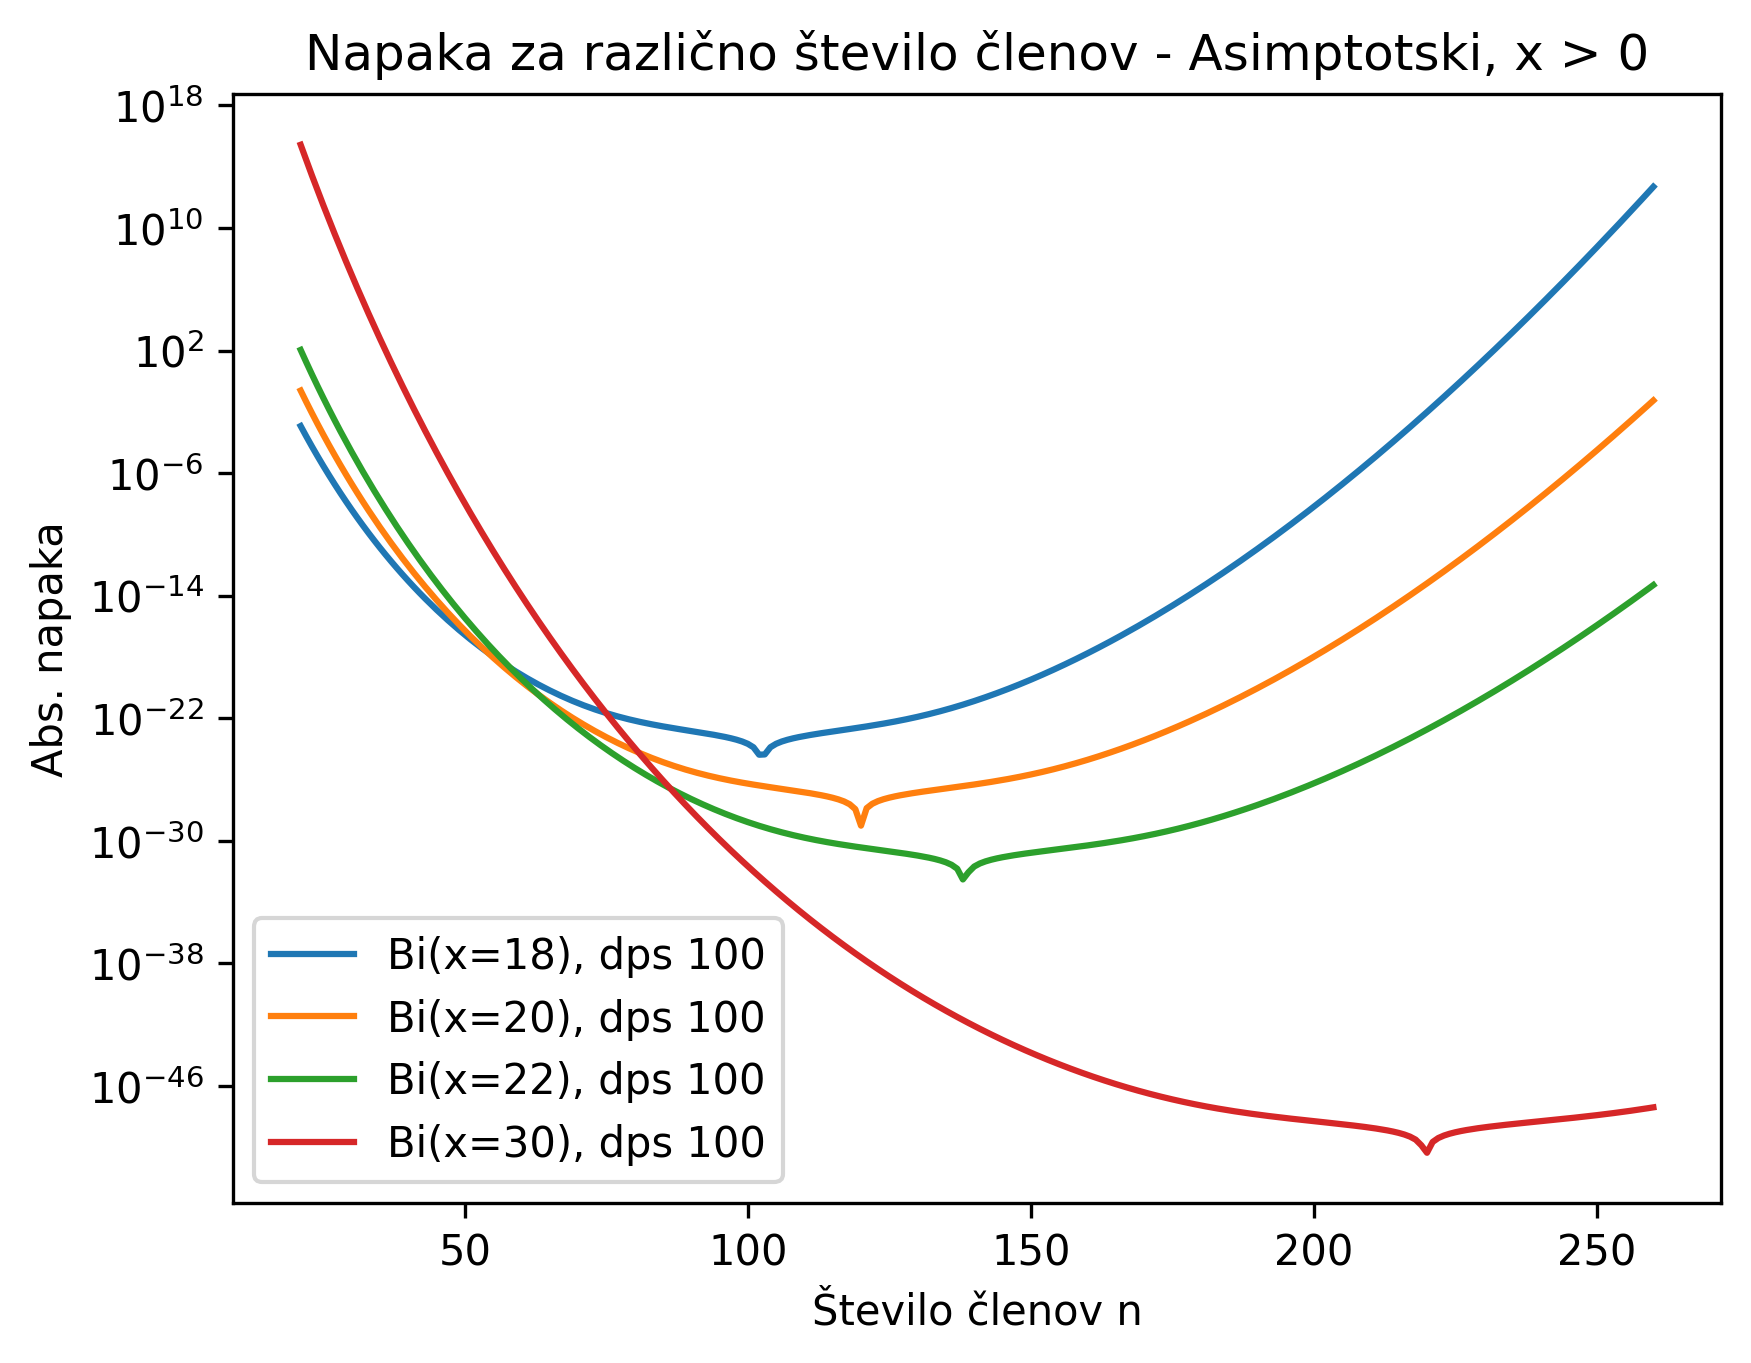

In [28]:
mp.dps = 200
x_range = [18,20,22,30]
n_range = []
napake = []

for j, x in enumerate(x_range):
    n_range.append(np.arange(21, 261, 1))
    napake.append(mp.matrix(1, n_range[0].size))
    for i, n in enumerate(n_range[j]):
        A_i, B_i = fa.airy_asimp_pos(x, n, brk=False)
        A_i_ref, B_i_ref = mp.airyai(x), mp.airybi(x)
        napake[j][i] = np.abs(B_i_ref - B_i)
    plt.plot(n_range[j], napake[j], label=f'Bi(x={x}), dps 100')


plt.title('Napaka za različno število členov - Asimptotski, x > 0')
plt.xlabel('Število členov n')
plt.ylabel('Abs. napaka')
plt.yscale('log')
plt.legend()
plt.show()

> **Napaka za različno število členov**: Asimptotskemu razvoju v našem primeru pada absolutna napaka samo do nekega končnega števila členov. Zato v nadaljevanju naloge jemljemo nove člene le, če so le-ti po absolutni vrednosti manjši od naslednjega. 

### Za velike pozitivne $x$

Za velike pozitivne $x$ implementiramo funkcijo $L(z)$ rekurzivno kot vsoto členov $l_n $ za $ n \in \mathbb{N}$

$$ l_{n} = l_{n-1} \cdot \frac{l_n}{l_{n-1}} = l_{n-1} \cdot \frac{(3n + \frac{5}{3})(3n + \frac{1}{2})}{(n + 1)\, 18 \, z}, \quad l_0 = 1.$$

Izračunane vrednosti primerjamo z referenčno funkcijo. Pri računanju z rekurzivno formulo povečujemo število členov dokler ne dosežemo najmanjšega razdalje do reference. 

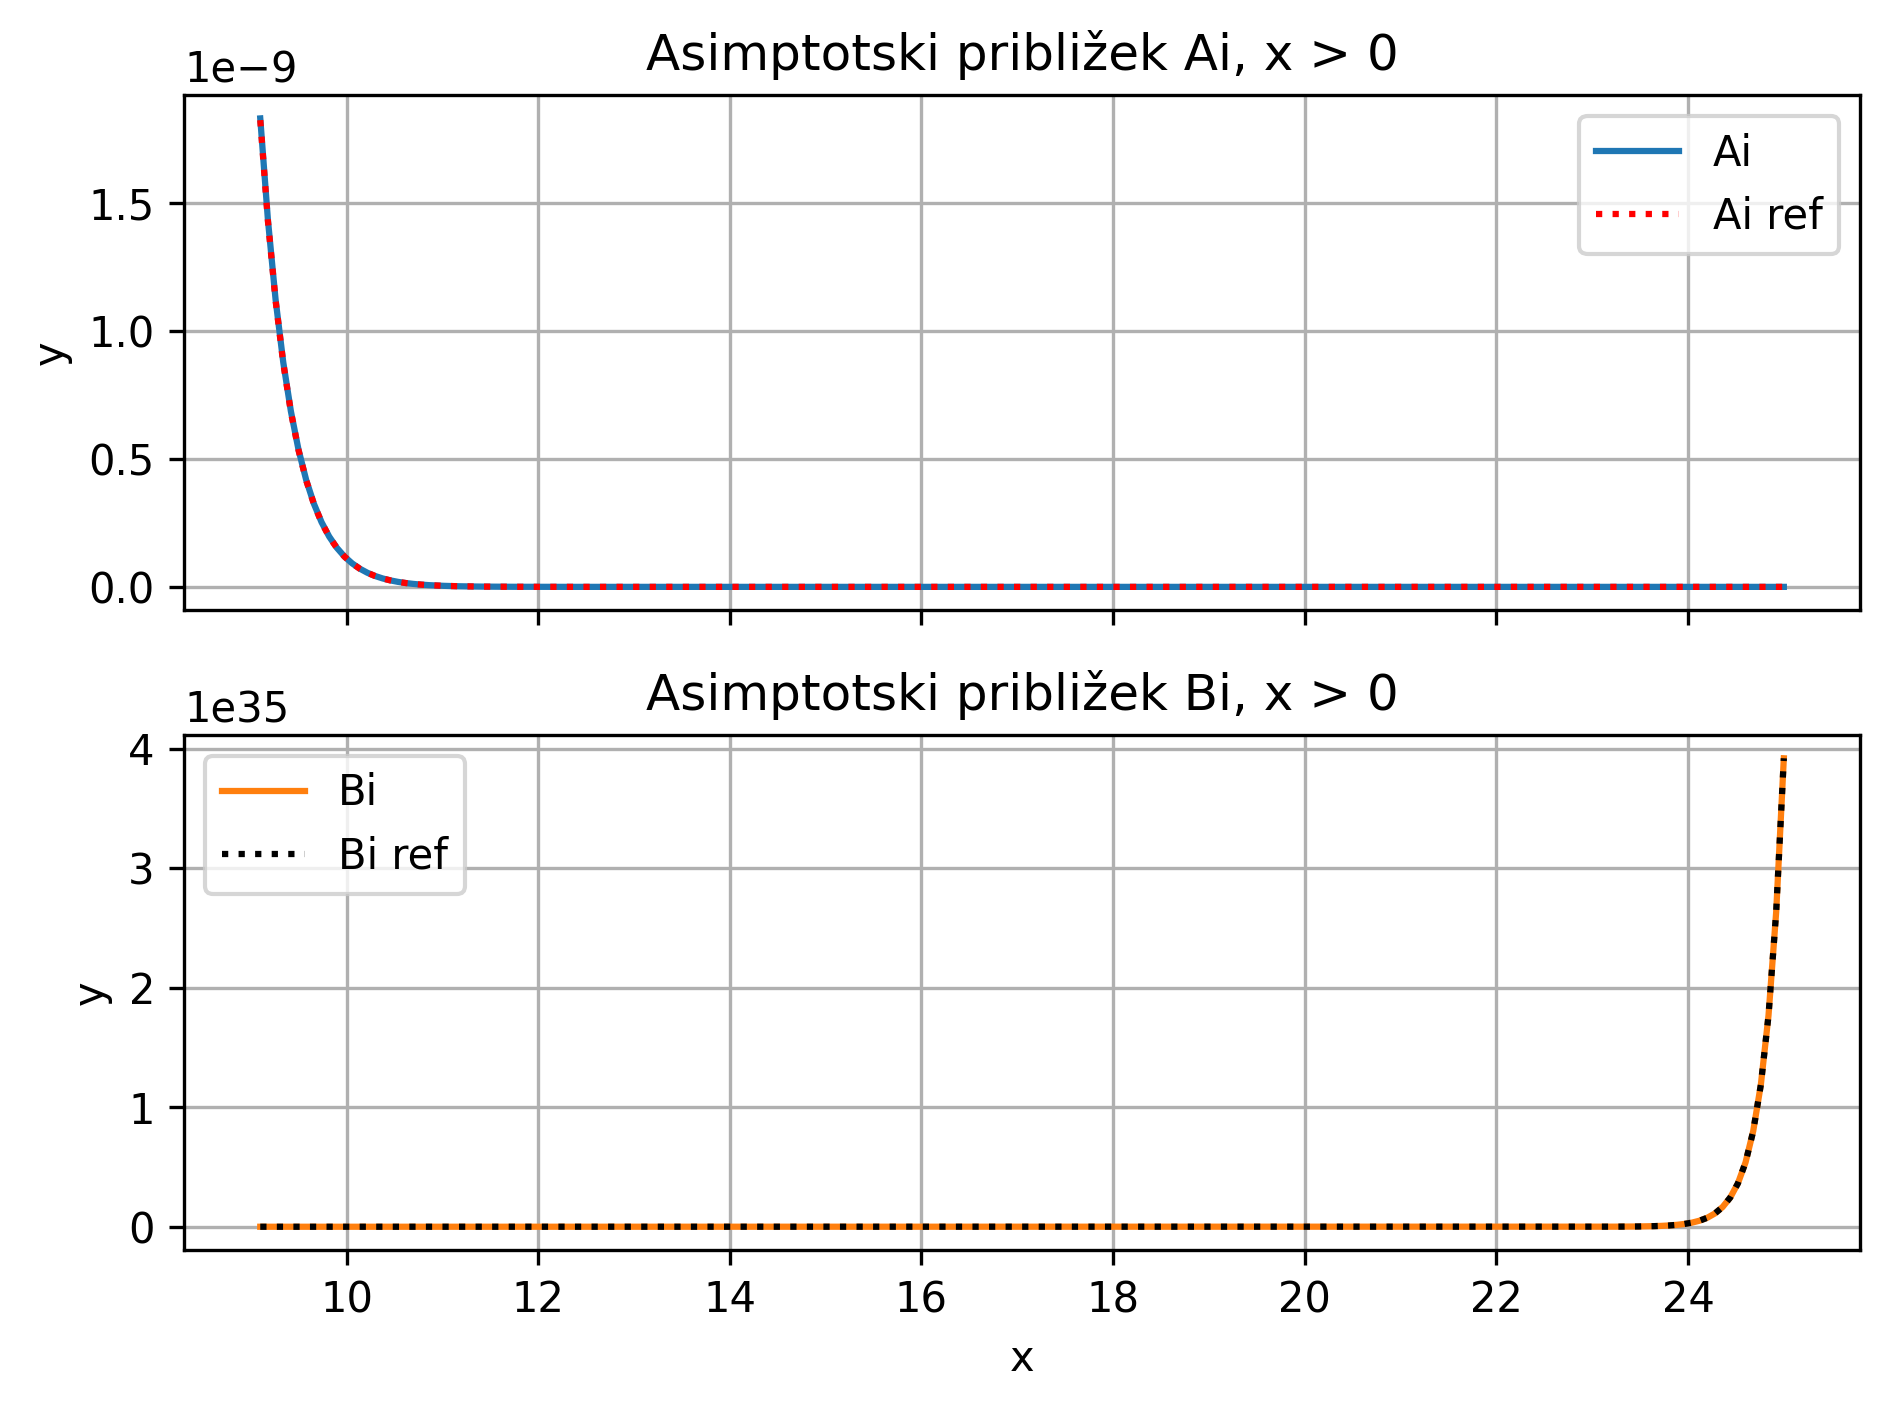

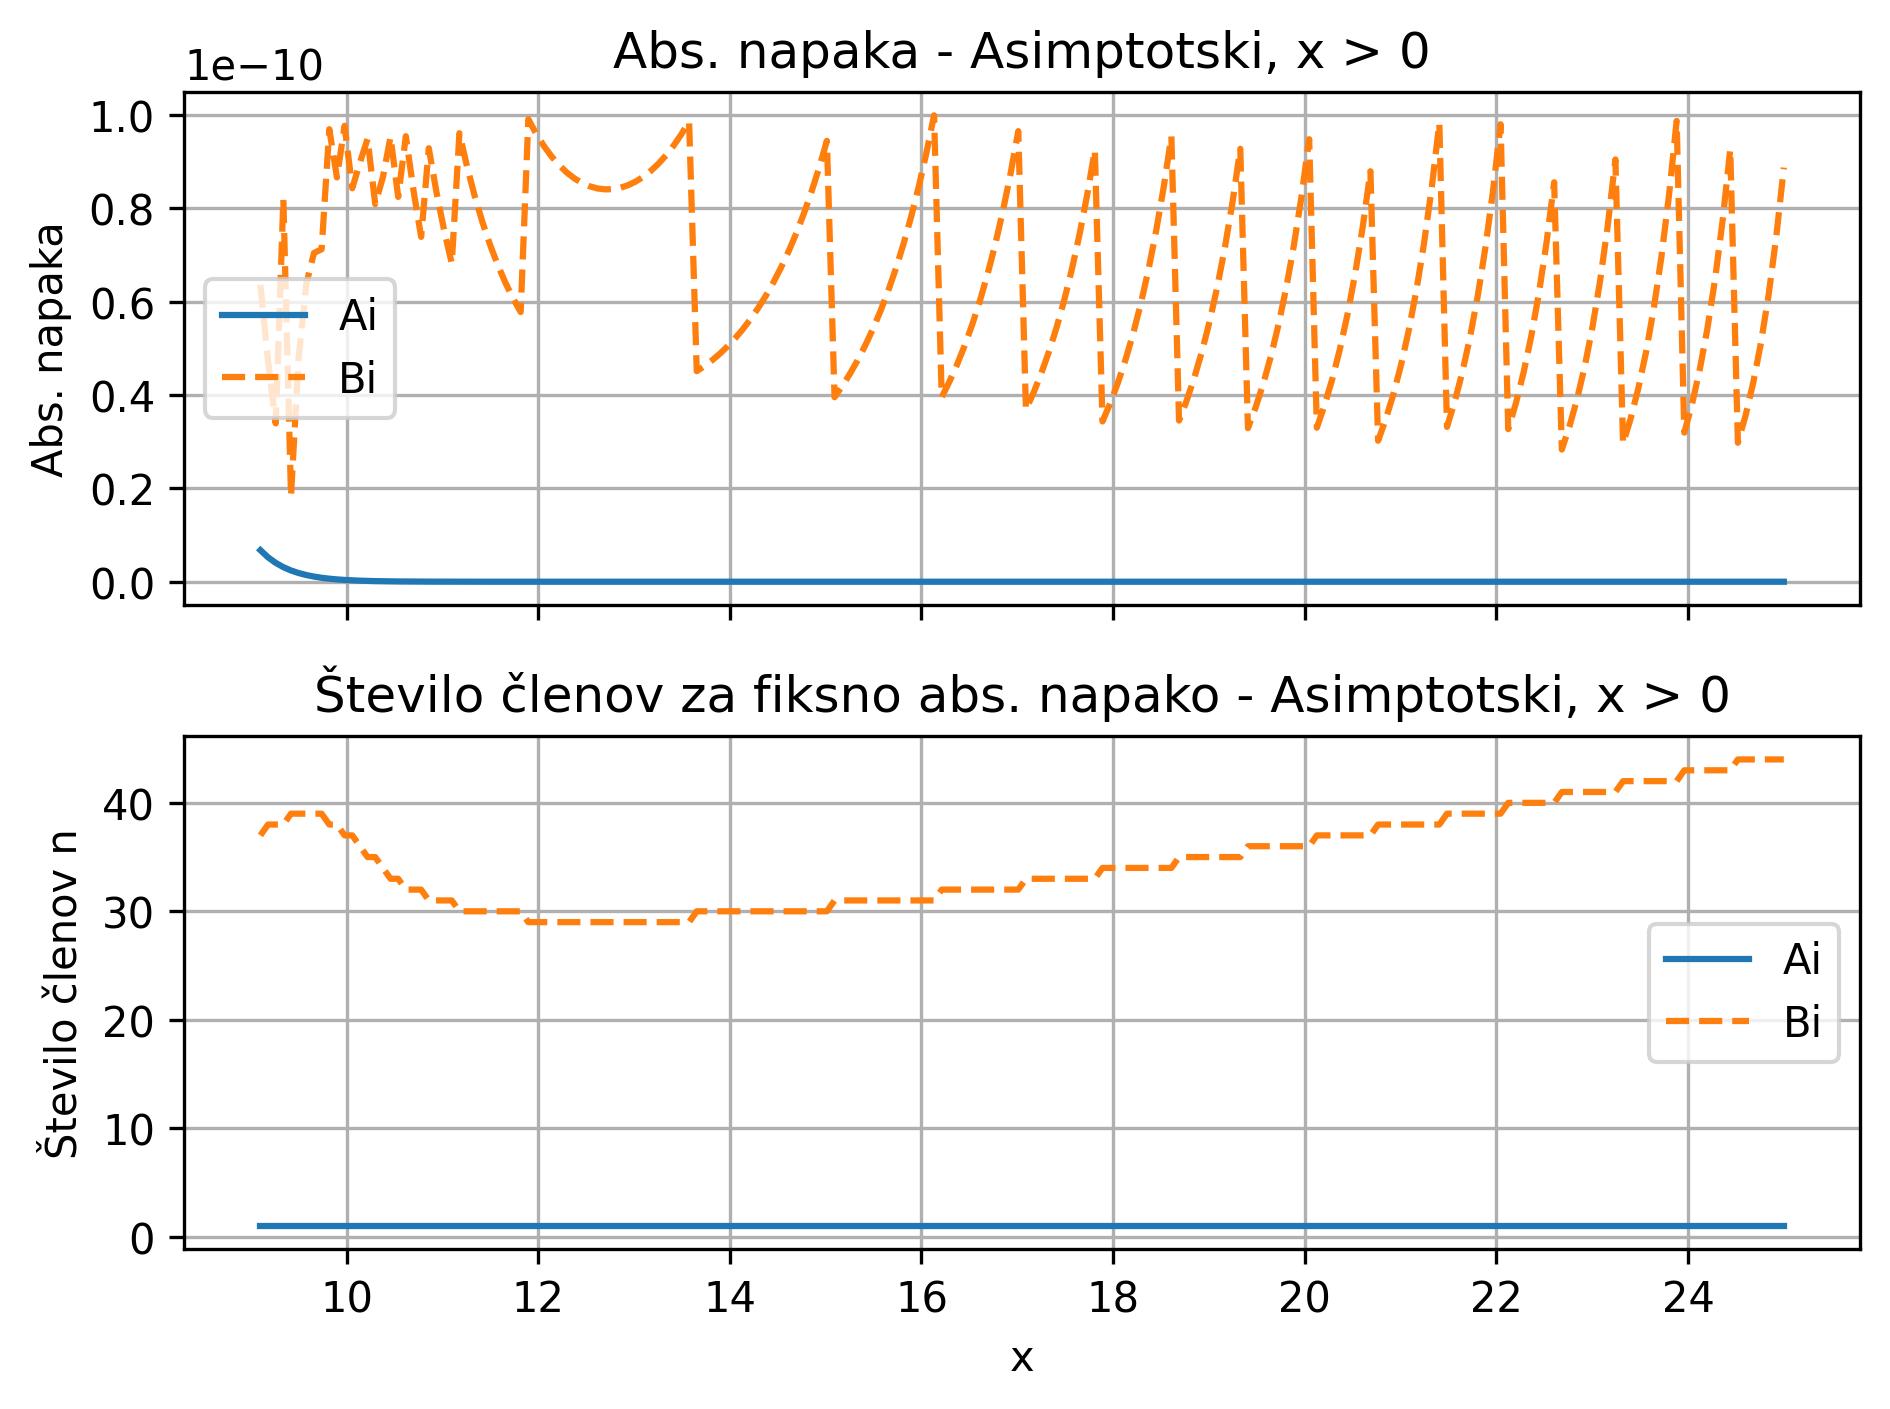

In [29]:
precision = fa.c(1e-10)
mp.dps = 200

def ai_pos(x, n):
    A_i, _ = fa.airy_asimp_pos(x, n)
    return A_i
def bi_pos(x, n):
    _, B_i = fa.airy_asimp_pos(x, n)
    return B_i


x_range = np.linspace(9.1, 25, 200)

A_i_ref = mp.matrix(1, x_range.shape[0])
B_i_ref = mp.matrix(1, x_range.shape[0])
A_i = mp.matrix(1, x_range.shape[0])
B_i = mp.matrix(1, x_range.shape[0])
A_i_n = mp.matrix(1, x_range.shape[0])
B_i_n = mp.matrix(1, x_range.shape[0])


for i,x in enumerate(x_range):
    x_mp = fa.c(x)
    A_i_ref[i] = mp.airyai(x_mp)
    B_i_ref[i] = mp.airybi(x_mp)
    A_i[i], A_i_n[i] = fa.optimize(x_mp, ai_pos, A_i_ref[i], precision)
    B_i[i], B_i_n[i] = fa.optimize(x_mp, bi_pos, B_i_ref[i], precision)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot A_i and its reference on the first subplot (ax1)
ax1.plot(x_range, A_i, label='Ai')
ax1.plot(x_range, A_i_ref, label='Ai ref', linestyle='dotted', color='red')
ax1.set_title('Asimptotski približek Ai, x > 0')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid()

# Plot B_i and its reference on the second subplot (ax2)
ax2.plot(x_range, B_i, label='Bi', color='tab:orange')
ax2.plot(x_range, B_i_ref, label='Bi ref', linestyle='dotted', color='black')
ax2.set_title('Asimptotski približek Bi, x > 0')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()


# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Abs. napaka - Asimptotski, x > 0')
ax1.plot(x_range, np.abs(A_i_ref - A_i), label='Ai')
ax1.plot(x_range, np.abs(B_i_ref - B_i), label='Bi', linestyle='--')
ax1.set_ylabel('Abs. napaka')
ax1.grid()
ax1.legend()

# Plot the second graph on the bottom subplot
ax2.set_title('Število členov za fiksno abs. napako - Asimptotski, x > 0')
ax2.plot(x_range, A_i_n, label='Ai')
ax2.plot(x_range, B_i_n, label='Bi', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Število členov n')
ax2.grid()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


> **Absolutna napaka:** Podobno kot pri prejšnjem razvoju opazimo stopničastost pri padcih napake. Število členov za doseganje ustrezne absolutne napake pri $\text{Bi}$ narašča. Vendar so tudi vrednosti funkcije ekstremne; $\text{Bi}$ izjemno hitro narašča, $\text{Ai}$ pa postaja zelo majhna.

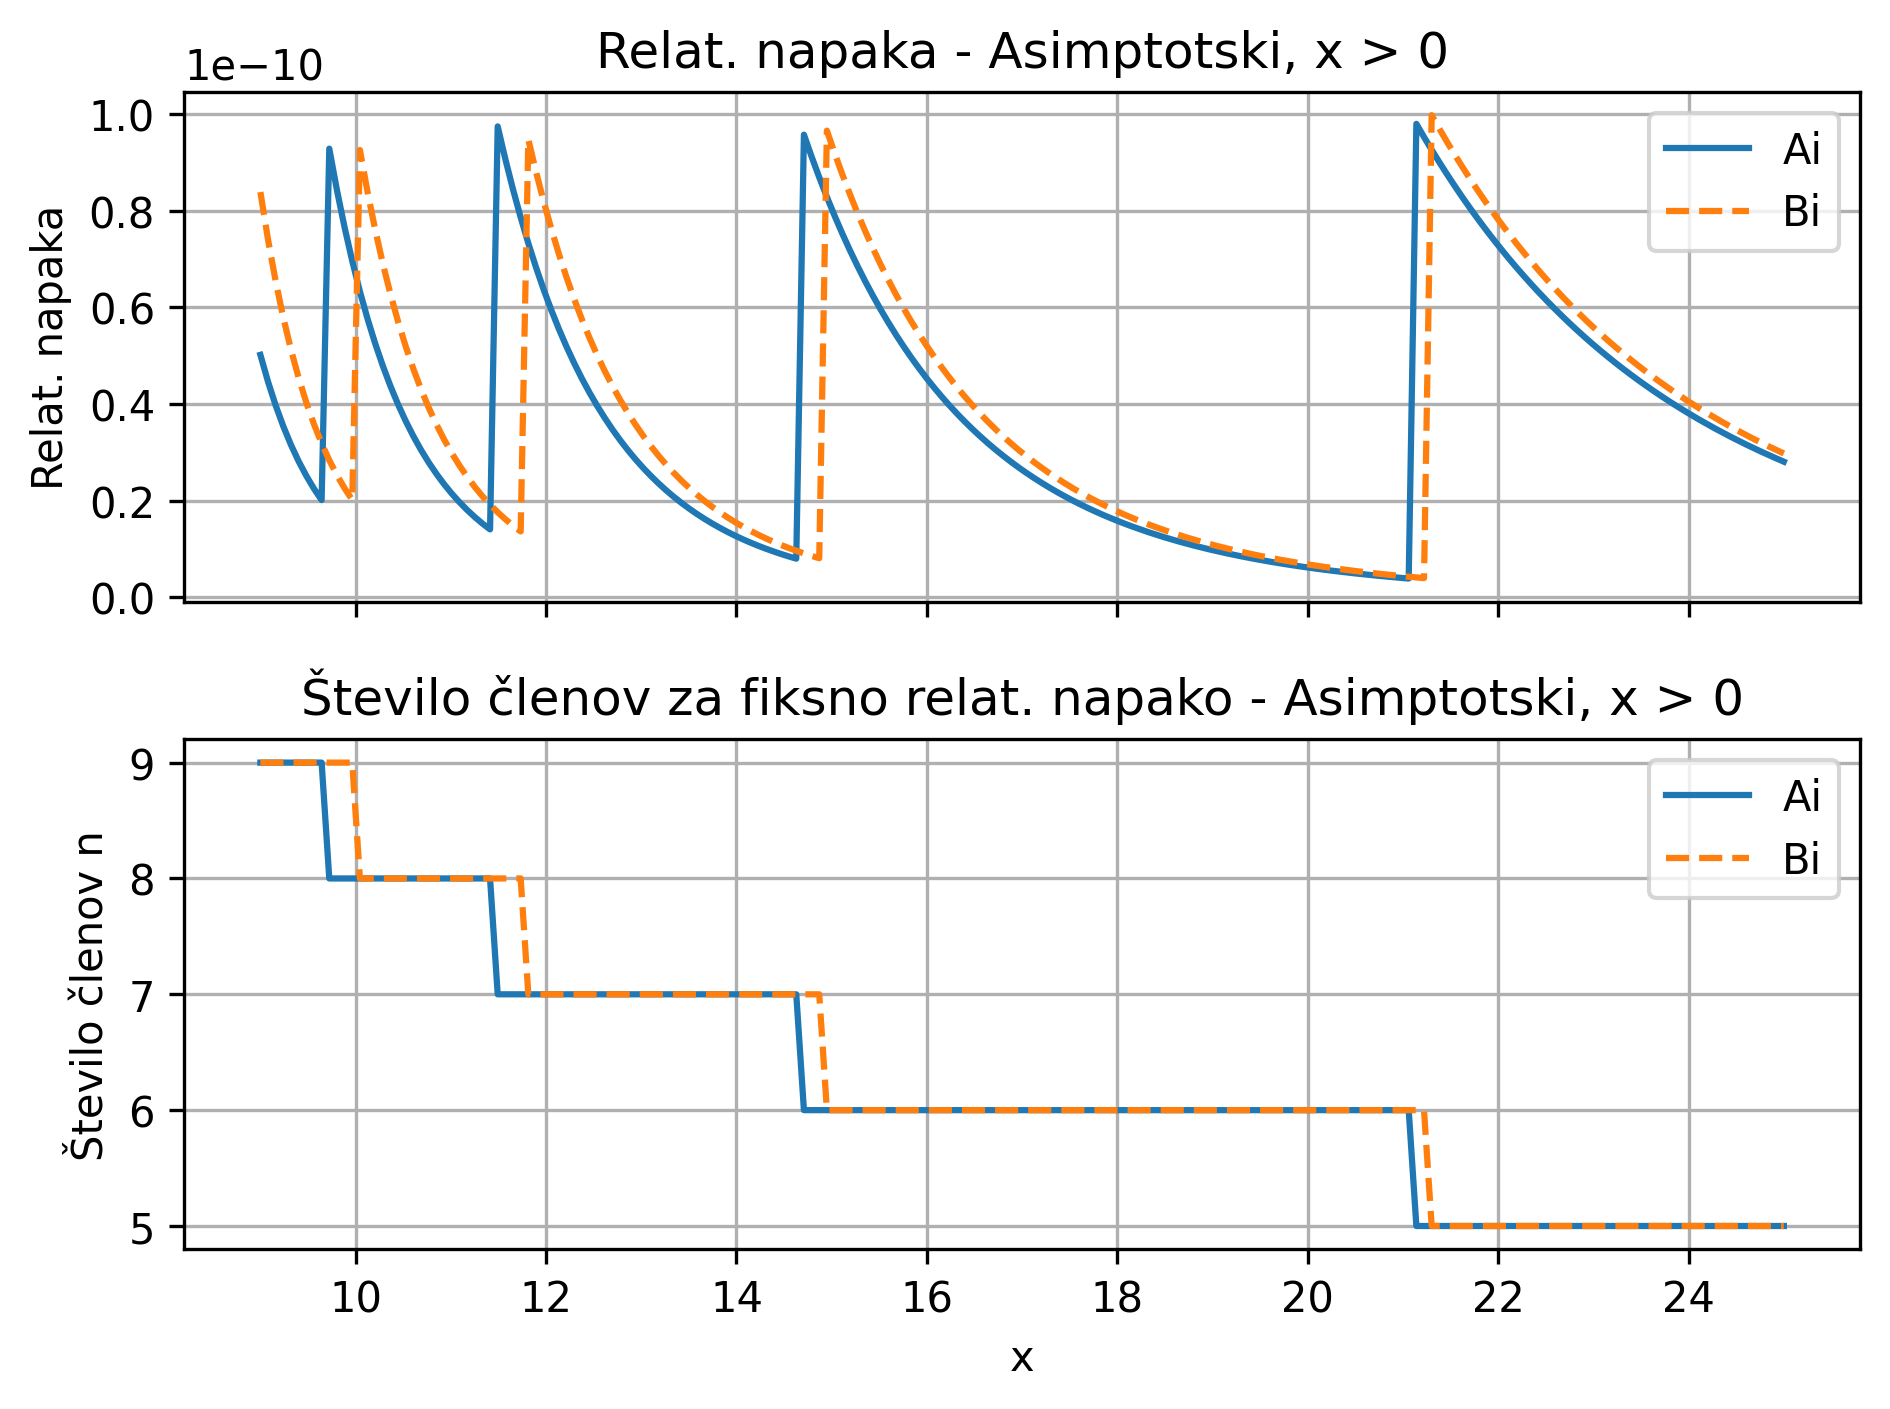

In [30]:
precision = fa.c(1e-10)
mp.dps = 200

x_range = np.linspace(9, 25, 200)

A_i_ref = mp.matrix(1, x_range.shape[0])
B_i_ref = mp.matrix(1, x_range.shape[0])
A_i = mp.matrix(1, x_range.shape[0])
B_i = mp.matrix(1, x_range.shape[0])
A_i_n = mp.matrix(1, x_range.shape[0])
B_i_n = mp.matrix(1, x_range.shape[0])


for i,x in enumerate(x_range):
    x_mp = fa.c(x)
    A_i_ref[i] = mp.airyai(x_mp)
    B_i_ref[i] = mp.airybi(x_mp)
    A_i[i], A_i_n[i] = fa.optimize_relative(x_mp, ai_pos, A_i_ref[i], precision)
    B_i[i], B_i_n[i] = fa.optimize_relative(x_mp, bi_pos, B_i_ref[i], precision)

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Relat. napaka - Asimptotski, x > 0')
ax1.plot(x_range, np.abs(np.abs(A_i_ref - A_i)/ A_i_ref), label='Ai')
ax1.plot(x_range, np.abs(np.abs(B_i_ref - B_i) / B_i_ref), label='Bi', linestyle='--')
ax1.set_ylabel('Relat. napaka')
ax1.grid()
ax1.legend()

# Plot the second graph on the bottom subplot
ax2.set_title('Število členov za fiksno relat. napako - Asimptotski, x > 0')
ax2.plot(x_range, A_i_n, label='Ai')
ax2.plot(x_range, B_i_n, label='Bi', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Število členov n')
ax2.grid()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


> **Relativna napaka:** Zanimivo, za doseganje ustrezne relativne napake potrebujemo vse manj členov, saj pri večjih vrednostih $x$ manjšo vlogo igrajo decimalke. Ta argument je smiseln za $\text{Bi}$, funkcija $\text{Ai}$ pa ima že sama po sebi pri tako velikih $x$ vrednost blizu $10^{-9}$, kar je skoraj znotraj iskanega intervala.

### Za po absolutni vrednosti velike negativne $x$

Za po absolutni vrednosti velike negativne $x$ implementiramo funkciji $P(z)$ in $Q(z)$ rekurzivno kot vsoto členov $p_n $ oz. $q_n$ za $ n \in \mathbb{N}$

$$ p_{n} = p_{n-1} \cdot \frac{p_n}{p_{n-1}} = p_{n-1} \cdot - \frac{(6n - \frac{1}{2})(6n - \frac{5}{2})(6n - \frac{7}{2})(6n - \frac{11}{2})}{(2n - 1)(2n)\, 18^2 \, z^2}, \quad p_0 = 1$$

$$ q_{n} = q_{n-1} \cdot \frac{q_n}{q_{n-1}} = q_{n-1} \cdot - \frac{(6n - \frac{1}{2})(6n - \frac{5}{2})(6n + \frac{1}{2})(6n + \frac{5}{2})}{(2n + 1)(2n)\, 18^2 \, z^2}, \quad q_0 = \frac{5}{72z}.$$


Izračunane vrednosti primerjamo z referenčno funkcijo. Pri računanju z rekurzivno formulo število členov povečujemo dokler ne dosežemo najmanjšega razdalje do reference. 

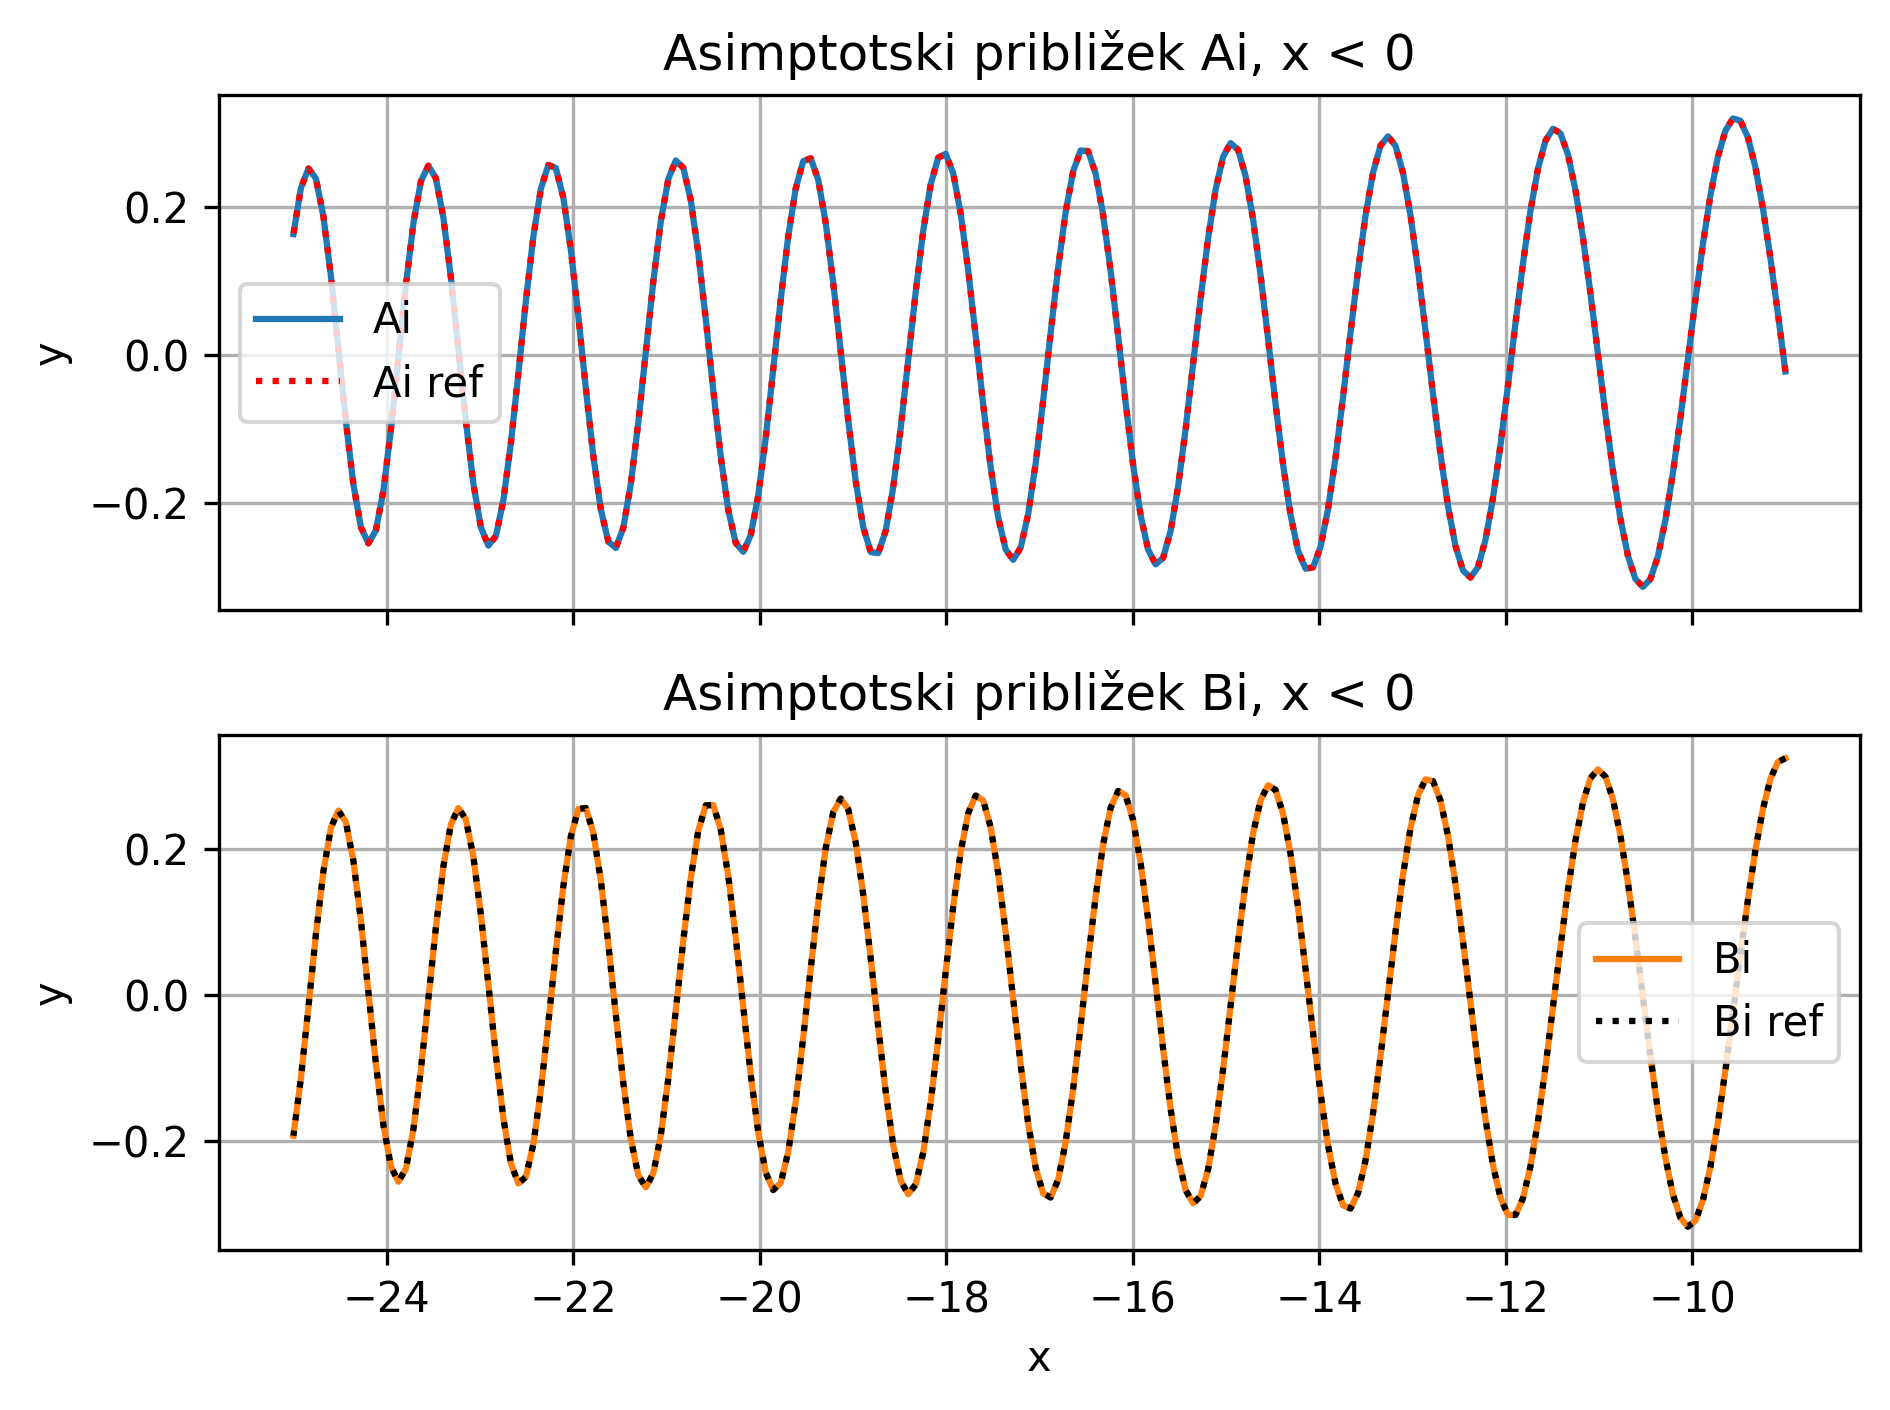

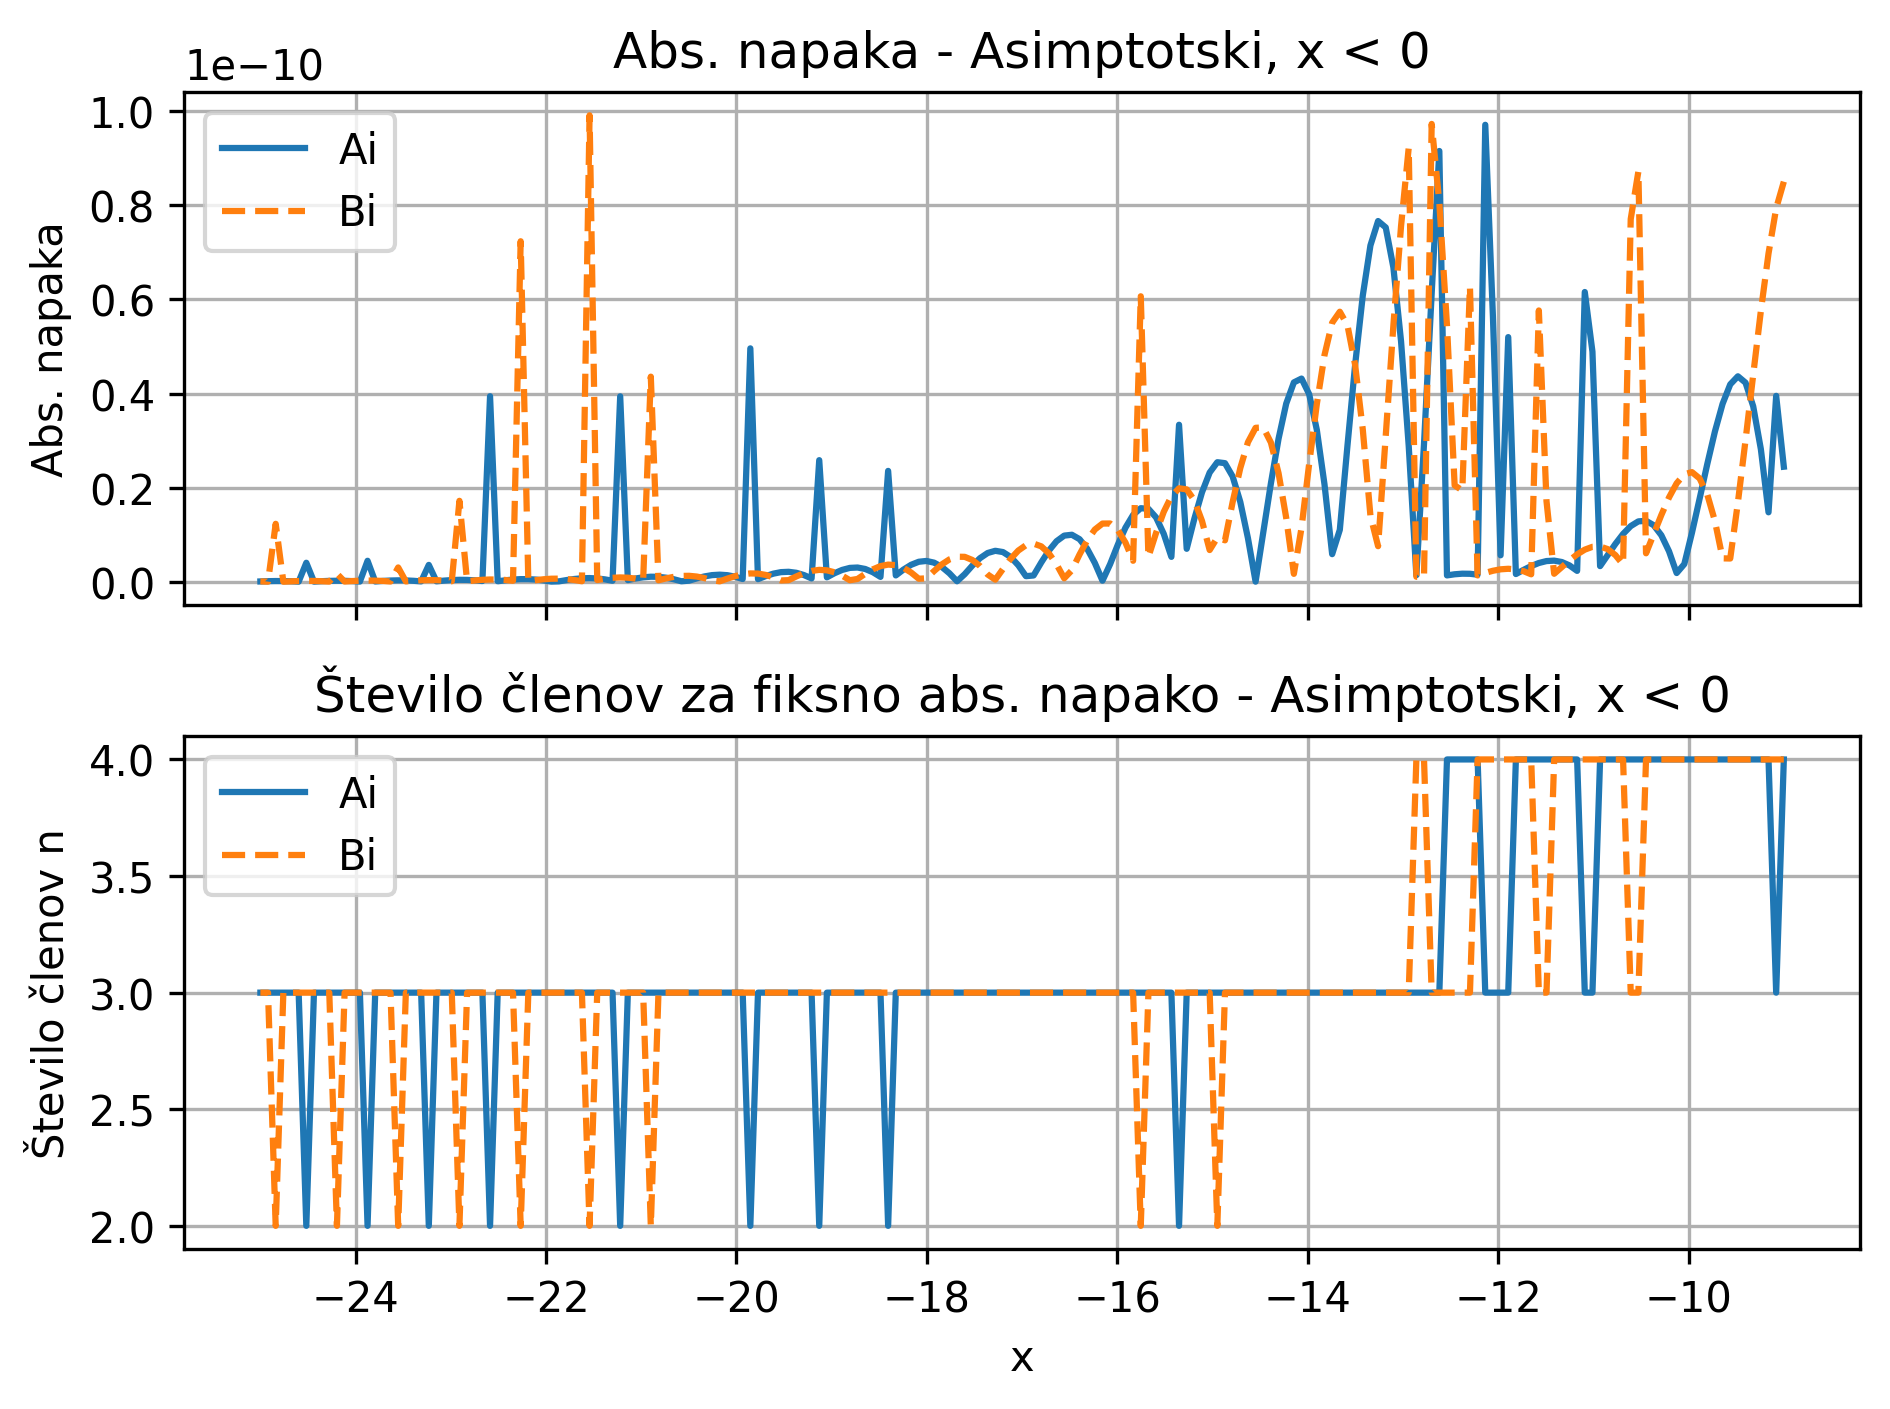

In [31]:
precision = fa.c(1e-10)
mp.dps = 200

def ai_neg(x, n):
    A_i, _ = fa.airy_asimp_neg(x, n)
    return A_i
def bi_neg(x, n):
    _, B_i = fa.airy_asimp_neg(x, n)
    return B_i


x_range = np.linspace(-9, -25, 200)

A_i_ref = mp.matrix(1, x_range.shape[0])
B_i_ref = mp.matrix(1, x_range.shape[0])
A_i = mp.matrix(1, x_range.shape[0])
B_i = mp.matrix(1, x_range.shape[0])
A_i_n = mp.matrix(1, x_range.shape[0])
B_i_n = mp.matrix(1, x_range.shape[0])


for i,x in enumerate(x_range):
    x_mp = fa.c(x)
    A_i_ref[i] = mp.airyai(x_mp)
    B_i_ref[i] = mp.airybi(x_mp)
    A_i[i], A_i_n[i] = fa.optimize(x_mp, ai_neg, A_i_ref[i], precision)
    B_i[i], B_i_n[i] = fa.optimize(x_mp, bi_neg, B_i_ref[i], precision)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot A_i and its reference on the first subplot (ax1)
ax1.plot(x_range, A_i, label='Ai')
ax1.plot(x_range, A_i_ref, label='Ai ref', linestyle='dotted', color='red')
ax1.set_title('Asimptotski približek Ai, x < 0')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid()

# Plot B_i and its reference on the second subplot (ax2)
ax2.plot(x_range, B_i, label='Bi', color='tab:orange')
ax2.plot(x_range, B_i_ref, label='Bi ref', linestyle='dotted', color='black')
ax2.set_title('Asimptotski približek Bi, x < 0')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()


# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Abs. napaka - Asimptotski, x < 0')
ax1.plot(x_range, np.abs(A_i_ref - A_i), label='Ai')
ax1.plot(x_range, np.abs(B_i_ref - B_i), label='Bi', linestyle='--')
ax1.set_ylabel('Abs. napaka')
ax1.grid()
ax1.legend()

# Plot the second graph on the bottom subplot
ax2.set_title('Število členov za fiksno abs. napako - Asimptotski, x < 0')
ax2.plot(x_range, A_i_n, label='Ai')
ax2.plot(x_range, B_i_n, label='Bi', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Število členov n')
ax2.grid()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


> **Absolutna napaka:** Absolutna napaka je ustrezna, število členov z manjšanjem $x$ pada.

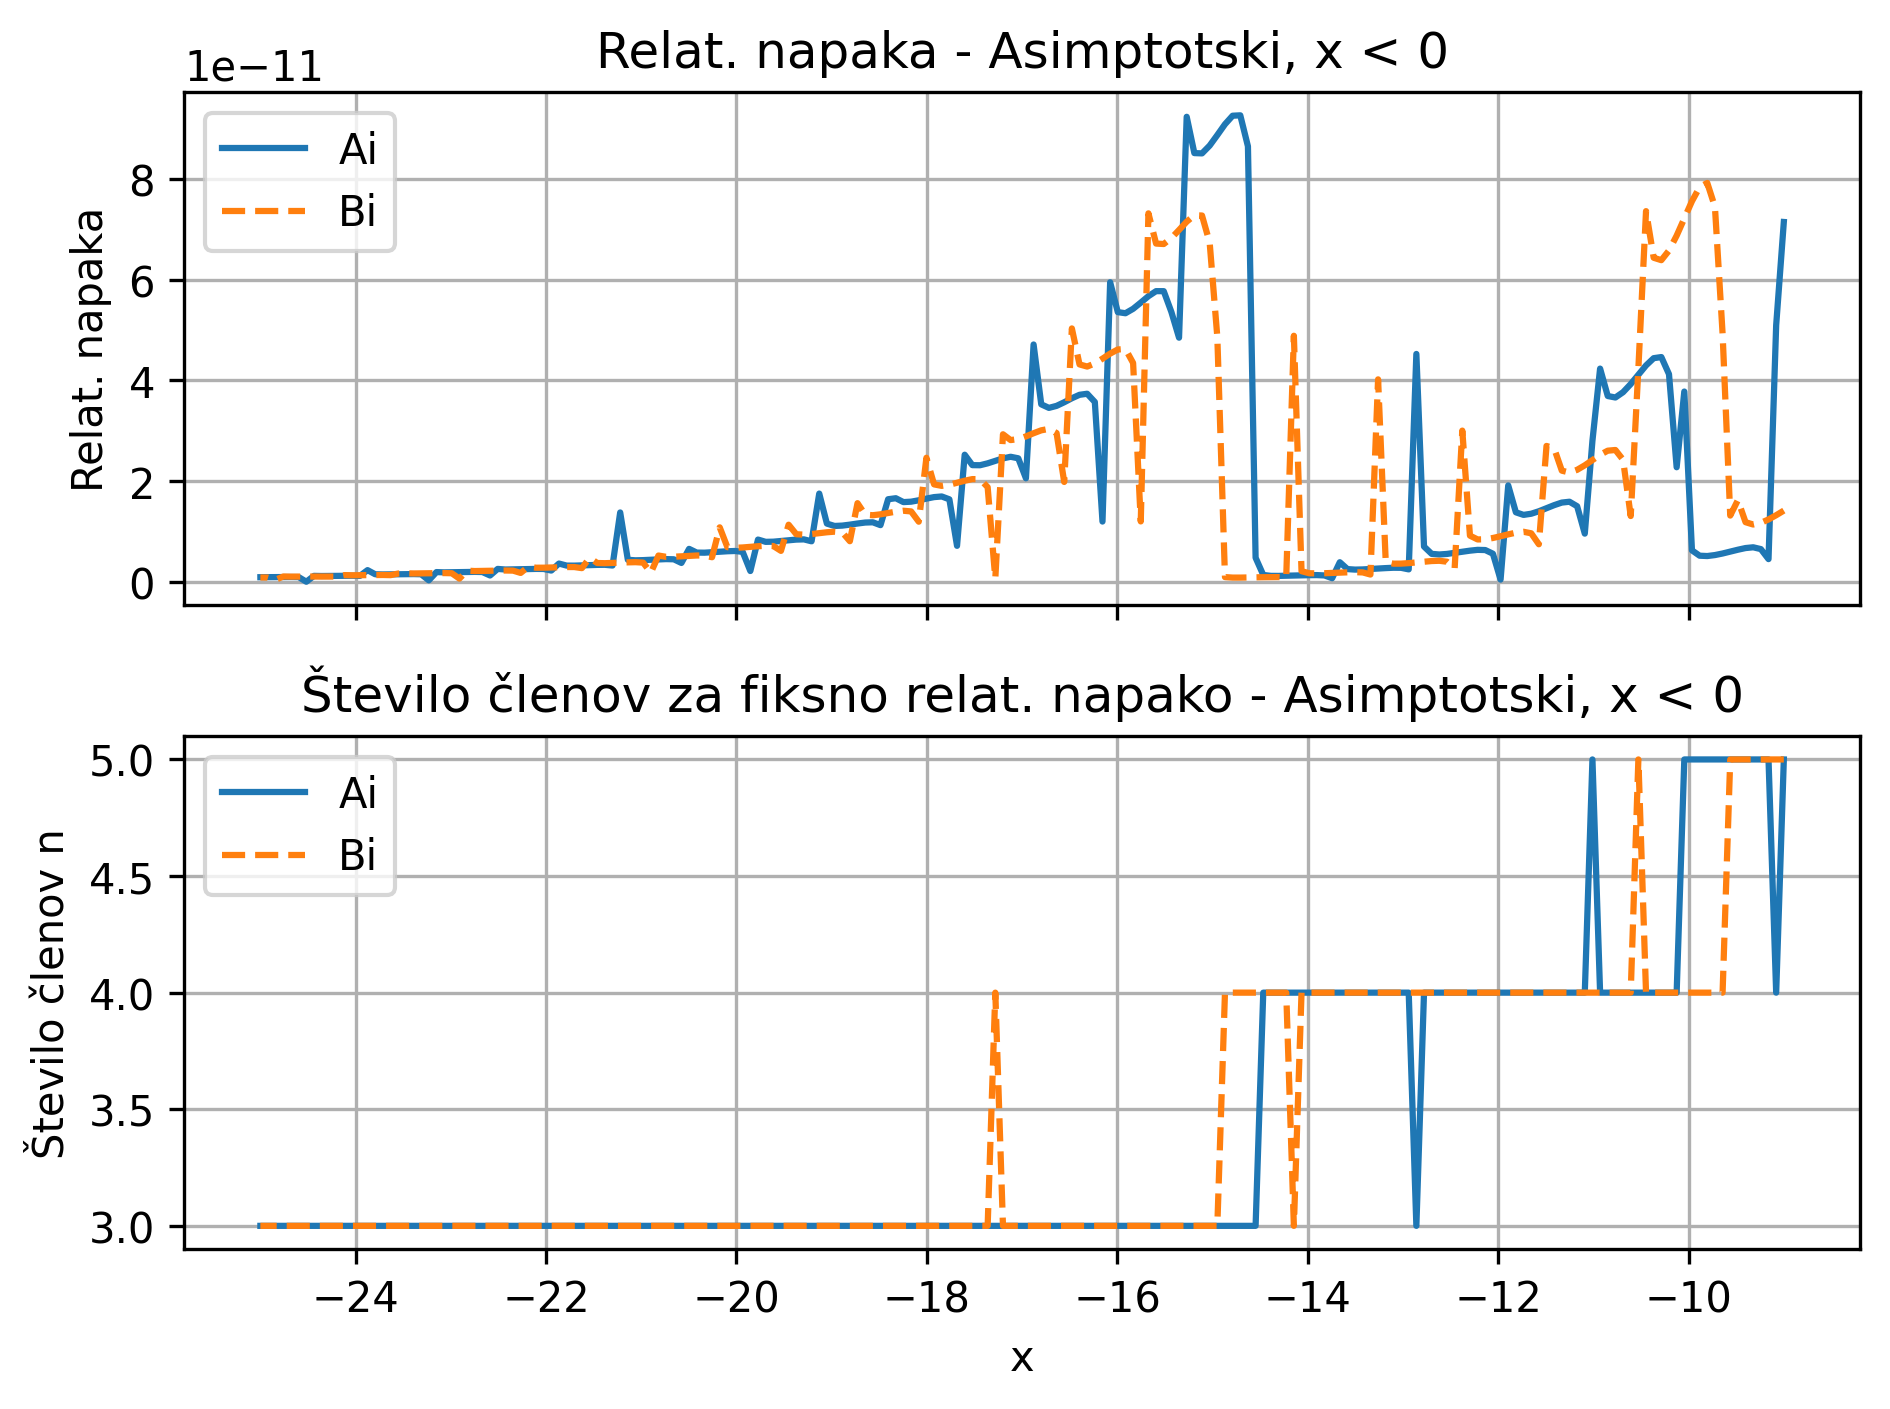

In [32]:
precision = fa.c(1e-10)
mp.dps = 200

x_range = np.linspace(-9, -25, 200)

A_i_ref = mp.matrix(1, x_range.shape[0])
B_i_ref = mp.matrix(1, x_range.shape[0])
A_i = mp.matrix(1, x_range.shape[0])
B_i = mp.matrix(1, x_range.shape[0])
A_i_n = mp.matrix(1, x_range.shape[0])
B_i_n = mp.matrix(1, x_range.shape[0])


for i,x in enumerate(x_range):
    x_mp = fa.c(x)
    A_i_ref[i] = mp.airyai(x_mp)
    B_i_ref[i] = mp.airybi(x_mp)
    A_i[i], A_i_n[i] = fa.optimize_relative(x_mp, ai_neg, A_i_ref[i], precision)
    B_i[i], B_i_n[i] = fa.optimize_relative(x_mp, bi_neg, B_i_ref[i], precision)

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Relat. napaka - Asimptotski, x < 0')
ax1.plot(x_range, np.abs(np.abs(A_i_ref - A_i)/ A_i_ref), label='Ai')
ax1.plot(x_range, np.abs(np.abs(B_i_ref - B_i) / B_i_ref), label='Bi', linestyle='--')
ax1.set_ylabel('Relat. napaka')
ax1.grid()
ax1.legend()

# Plot the second graph on the bottom subplot
ax2.set_title('Število členov za fiksno relat. napako - Asimptotski, x < 0')
ax2.plot(x_range, A_i_n, label='Ai')
ax2.plot(x_range, B_i_n, label='Bi', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Število členov n')
ax2.grid()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

> **Relativna napaka:** Relativna napaka je ustrezna, število členov in tudi relativna napaka z manjšanjem $x$ pada.

## Zlepek približkov

V nadaljevanju bomo naše vrste zlepili in tako dobili Python funkcije, ki lahko učinkovito izračunajo $\text{Ai}$ in $\text{Bi}$ v okviru absolutne in relativne napake za celotno realno os.

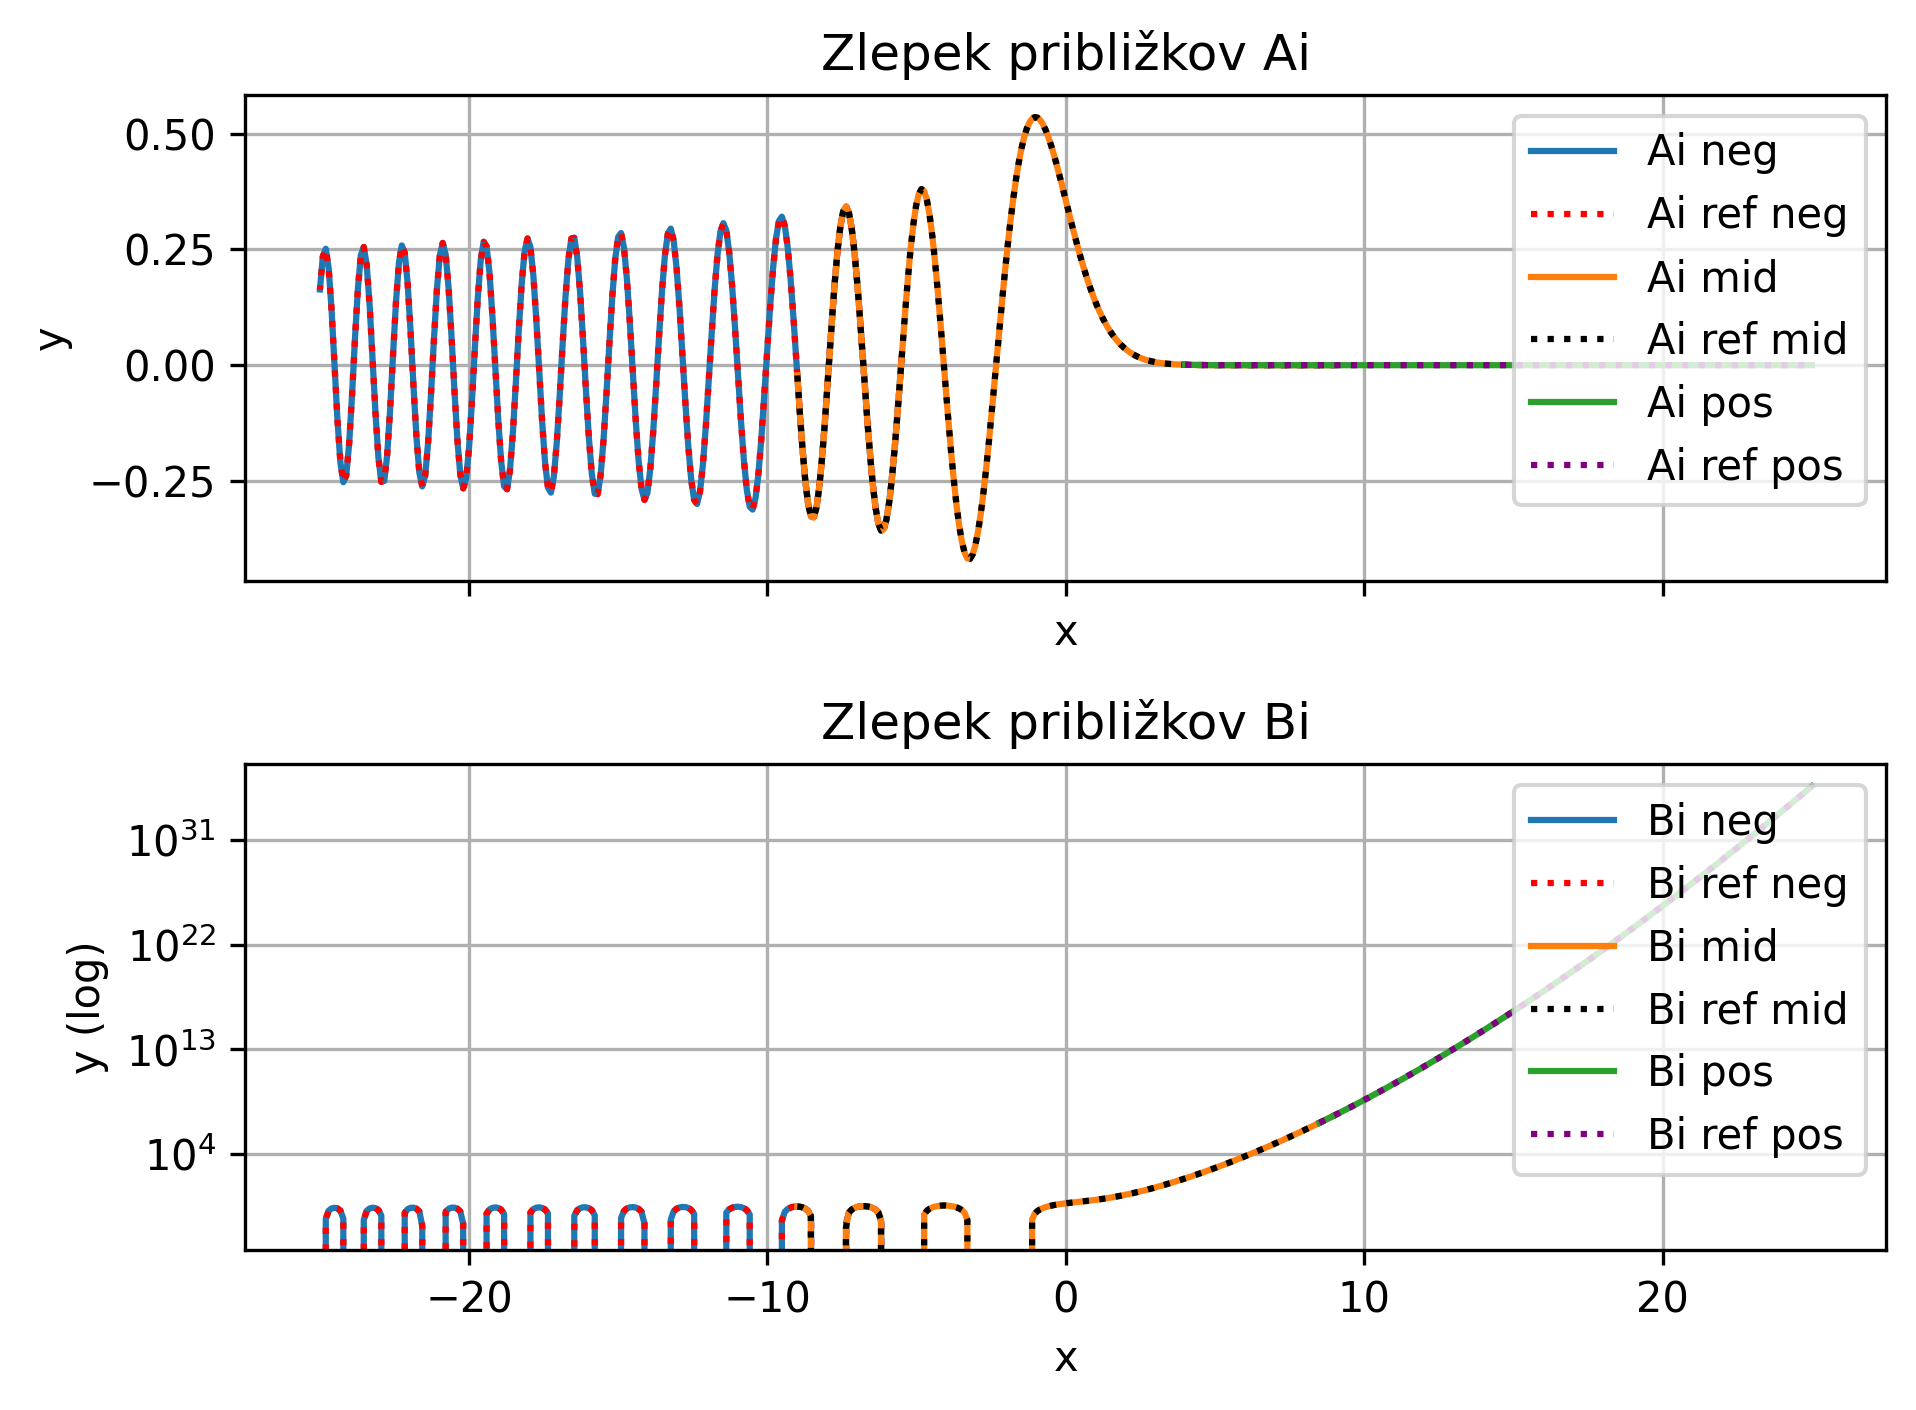

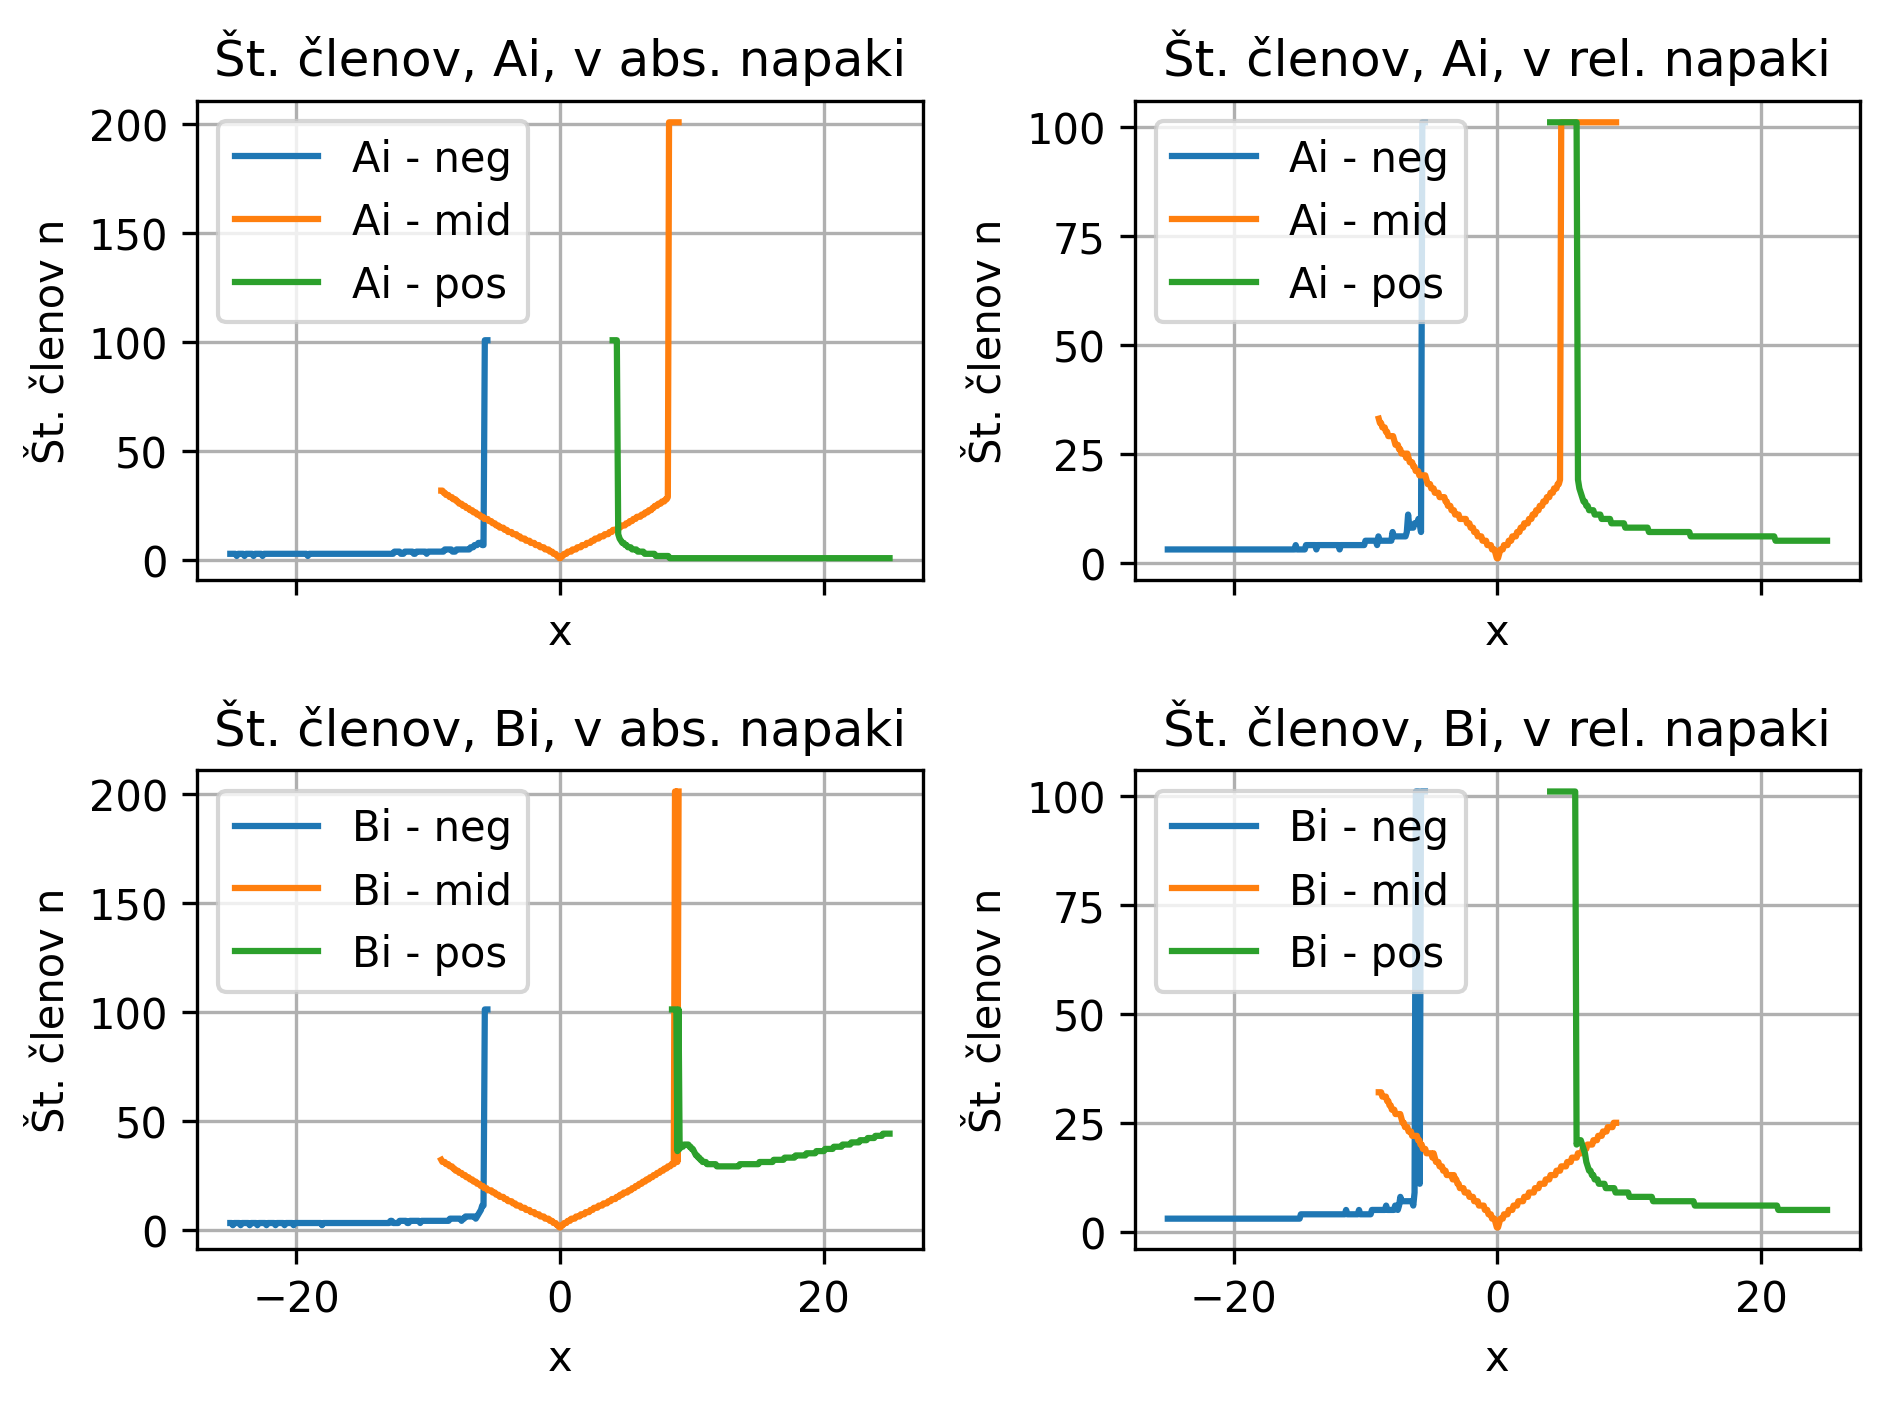

In [33]:
mp.dps = 120

x_range_neg = np.linspace(-5.5, -25, 200)
x_range_mid = np.linspace(-9, 9, 200)
x_range_pos = np.linspace(4, 25, 200)

x_range_pos_b = np.linspace(8.5, 25, 200)

A_i_neg = mp.matrix(1, x_range_neg.shape[0])
A_i_mid = mp.matrix(1, x_range_mid.shape[0])
A_i_pos = mp.matrix(1, x_range_pos.shape[0])

A_i_ref_neg = mp.matrix(1, x_range_neg.shape[0])
A_i_ref_mid = mp.matrix(1, x_range_mid.shape[0])
A_i_ref_pos = mp.matrix(1, x_range_pos.shape[0])

A_i_n_neg = mp.matrix(1, x_range_neg.shape[0])
A_i_n_mid = mp.matrix(1, x_range_mid.shape[0])
A_i_n_pos = mp.matrix(1, x_range_pos.shape[0])

B_i_neg = mp.matrix(1, x_range_neg.shape[0])
B_i_mid = mp.matrix(1, x_range_mid.shape[0])
B_i_pos = mp.matrix(1, x_range_pos.shape[0])

B_i_ref_neg = mp.matrix(1, x_range_neg.shape[0])
B_i_ref_mid = mp.matrix(1, x_range_mid.shape[0])
B_i_ref_pos = mp.matrix(1, x_range_pos.shape[0])

B_i_n_neg = mp.matrix(1, x_range_neg.shape[0])
B_i_n_mid = mp.matrix(1, x_range_mid.shape[0])
B_i_n_pos = mp.matrix(1, x_range_pos.shape[0])

for i,x in enumerate(x_range_neg):
    x_mp = fa.c(x)
    A_i_ref_neg[i] = mp.airyai(x_mp)
    A_i_neg[i], A_i_n_neg[i] = fa.optimize(x_mp, ai_neg, A_i_ref_neg[i], precision)
    B_i_ref_neg[i] = mp.airybi(x_mp)
    B_i_neg[i], B_i_n_neg[i] = fa.optimize(x_mp, bi_neg, B_i_ref_neg[i], precision)


for i,x in enumerate(x_range_mid):
    x_mp = fa.c(x)
    A_i_ref_mid[i] = mp.airyai(x_mp)
    A_i_mid[i], A_i_n_mid[i] = fa.optimize(x_mp, ai, A_i_ref_mid[i], precision, 200)
    B_i_ref_mid[i] = mp.airybi(x_mp)
    B_i_mid[i], B_i_n_mid[i] = fa.optimize(x_mp, bi, B_i_ref_mid[i], precision, 200)


for i,x in enumerate(x_range_pos):
    x_mp = fa.c(x)
    A_i_ref_pos[i] = mp.airyai(x_mp)
    A_i_pos[i], A_i_n_pos[i] = fa.optimize(x_mp, ai_pos, A_i_ref_pos[i], precision)

for i,x in enumerate(x_range_pos_b):
    x_mp = fa.c(x)
    B_i_ref_pos[i] = mp.airybi(x_mp)
    B_i_pos[i], B_i_n_pos[i] = fa.optimize(x_mp, bi_pos, B_i_ref_pos[i], precision)


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot A_i and its reference on the first subplot (ax1)
ax1.plot(x_range_neg, A_i_neg, label='Ai neg')
ax1.plot(x_range_neg, A_i_ref_neg, label='Ai ref neg', linestyle='dotted', color='red')
ax1.plot(x_range_mid, A_i_mid, label='Ai mid')
ax1.plot(x_range_mid, A_i_ref_mid, label='Ai ref mid', linestyle='dotted', color='black')
ax1.plot(x_range_pos, A_i_pos, label='Ai pos')
ax1.plot(x_range_pos, A_i_ref_pos, label='Ai ref pos', linestyle='dotted', color='purple')
ax1.set_title('Zlepek približkov Ai')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.legend(loc='upper right')
ax1.grid()

ax2.plot(x_range_neg, B_i_neg, label='Bi neg')
ax2.plot(x_range_neg, B_i_ref_neg, label='Bi ref neg', linestyle='dotted', color='red')
ax2.plot(x_range_mid, B_i_mid, label='Bi mid')
ax2.plot(x_range_mid, B_i_ref_mid, label='Bi ref mid', linestyle='dotted', color='black')
ax2.plot(x_range_pos_b, B_i_pos, label='Bi pos')
ax2.plot(x_range_pos_b, B_i_ref_pos, label='Bi ref pos', linestyle='dotted', color='purple')
ax2.set_title('Zlepek približkov Bi')
ax2.set_xlabel('x')
ax2.set_ylabel('y (log)')
ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax2.grid()
# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both subplots
plt.show()

# ---- ABSOLUTNA NAPAKA CHLENI PLOT ----

# Create a figure and two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

# Plot the first graph on the top subplot
ax1.set_title('Št. členov, Ai, v abs. napaki')
ax1.plot(x_range_neg, A_i_n_neg, label='Ai - neg')
ax1.plot(x_range_mid, A_i_n_mid, label='Ai - mid')
ax1.plot(x_range_pos, A_i_n_pos, label='Ai - pos')
ax1.set_xlabel('x')
ax1.set_ylabel('Št. členov n')
ax1.grid()
ax1.legend()

ax3.set_title('Št. členov, Bi, v abs. napaki')
ax3.plot(x_range_neg, B_i_n_neg, label='Bi - neg')
ax3.plot(x_range_mid, B_i_n_mid, label='Bi - mid')
ax3.plot(x_range_pos_b, B_i_n_pos, label='Bi - pos')
ax3.set_xlabel('x')
ax3.set_ylabel('Št. členov n')
ax3.grid()
ax3.legend()

# ---- RELATIVNA NAPAKA CHLENI PLOT ----

x_range_neg = np.linspace(-5.5, -25, 200)
x_range_mid = np.linspace(-9, 9, 200)
x_range_pos = np.linspace(4, 25, 200)

x_range_pos_b = np.linspace(4, 25, 200)

A_i_neg = mp.matrix(1, x_range_neg.shape[0])
A_i_mid = mp.matrix(1, x_range_mid.shape[0])
A_i_pos = mp.matrix(1, x_range_pos.shape[0])

A_i_ref_neg = mp.matrix(1, x_range_neg.shape[0])
A_i_ref_mid = mp.matrix(1, x_range_mid.shape[0])
A_i_ref_pos = mp.matrix(1, x_range_pos.shape[0])

A_i_n_neg = mp.matrix(1, x_range_neg.shape[0])
A_i_n_mid = mp.matrix(1, x_range_mid.shape[0])
A_i_n_pos = mp.matrix(1, x_range_pos.shape[0])

B_i_neg = mp.matrix(1, x_range_neg.shape[0])
B_i_mid = mp.matrix(1, x_range_mid.shape[0])
B_i_pos = mp.matrix(1, x_range_pos.shape[0])

B_i_ref_neg = mp.matrix(1, x_range_neg.shape[0])
B_i_ref_mid = mp.matrix(1, x_range_mid.shape[0])
B_i_ref_pos = mp.matrix(1, x_range_pos.shape[0])

B_i_n_neg = mp.matrix(1, x_range_neg.shape[0])
B_i_n_mid = mp.matrix(1, x_range_mid.shape[0])
B_i_n_pos = mp.matrix(1, x_range_pos.shape[0])

for i,x in enumerate(x_range_neg):
    x_mp = fa.c(x)
    A_i_ref_neg[i] = mp.airyai(x_mp)
    A_i_neg[i], A_i_n_neg[i] = fa.optimize_relative(x_mp, ai_neg, A_i_ref_neg[i], precision)
    B_i_ref_neg[i] = mp.airybi(x_mp)
    B_i_neg[i], B_i_n_neg[i] = fa.optimize_relative(x_mp, bi_neg, B_i_ref_neg[i], precision)


for i,x in enumerate(x_range_mid):
    x_mp = fa.c(x)
    A_i_ref_mid[i] = mp.airyai(x_mp)
    A_i_mid[i], A_i_n_mid[i] = fa.optimize_relative(x_mp, ai, A_i_ref_mid[i], precision, 100)
    B_i_ref_mid[i] = mp.airybi(x_mp)
    B_i_mid[i], B_i_n_mid[i] = fa.optimize_relative(x_mp, bi, B_i_ref_mid[i], precision, 100)


for i,x in enumerate(x_range_pos):
    x_mp = fa.c(x)
    A_i_ref_pos[i] = mp.airyai(x_mp)
    A_i_pos[i], A_i_n_pos[i] = fa.optimize_relative(x_mp, ai_pos, A_i_ref_pos[i], precision, 100)

for i,x in enumerate(x_range_pos_b):
    x_mp = fa.c(x)
    B_i_ref_pos[i] = mp.airybi(x_mp)
    B_i_pos[i], B_i_n_pos[i] = fa.optimize_relative(x_mp, bi_pos, B_i_ref_pos[i], precision, 100)

ax2.set_title('Št. členov, Ai, v rel. napaki')
ax2.plot(x_range_neg, A_i_n_neg, label='Ai - neg')
ax2.plot(x_range_mid, A_i_n_mid, label='Ai - mid')
ax2.plot(x_range_pos, A_i_n_pos, label='Ai - pos')
ax2.set_xlabel('x')
ax2.set_ylabel('Št. členov n')
ax2.grid()
ax2.legend(loc='upper left')

ax4.set_title('Št. členov, Bi, v rel. napaki')
ax4.plot(x_range_neg, B_i_n_neg, label='Bi - neg')
ax4.plot(x_range_mid, B_i_n_mid, label='Bi - mid')
ax4.plot(x_range_pos_b, B_i_n_pos, label='Bi - pos')
ax4.set_xlabel('x')
ax4.set_ylabel('Št. členov n')
ax4.grid()
ax4.legend(loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


> **Število členov v zlepkih**: Na grafih prikažemo potrebno število členov za doseganje absolutne in relativne napake manjše od $10^{-10}$ za zlepke $\text{Ai}$ in $\text{Bi}$. Vsi dobljeni zlepki so relativno učinkoviti (potrebujejo majhno število členov) z izjemo zgornjega desnega grafa. Tam imamo v bližini $x=4$ težave z doseganjem ciljane napake, saj število členov tako za Maclaurinovo in asimptotsko vrsto podivja (>500).

## Dodatno: Ničle funkcij 

Ničle funkcije $\text{Ai}$ pogosto srečamo v matematični analizi pri določitvi intervalov ničel specialnih funkcij in ortogonalnih polinomov ter v fiziki pri računu energijskih spektrov kvantnomehanskih sistemov. 

V nadaljevanju poiščemo prvih sto ničel $\{a_s\}_{s=1}^{100}$ Airyjeve funkcije $\text{Ai}$ in prvih sto ničel $\{b_s\}_{s=1}^{100}$ funkcije $\text{Bi}$ pri $x<0$. Za izračun uporabimo knjižnico `mpmath` in vgrajeni funkciji `airyaizero` in `airybizero`. Dobljene vrednosti primerjamo s formulama

$$
\begin{equation*}
  a_s = - f \left( \frac{3\pi(4s-1)}{8} \right) \>, \qquad
  b_s = - f \left( \frac{3\pi(4s-3)}{8} \right) \>, \qquad s = 1,2,\ldots \>,
\end{equation*}
$$
kjer ima funkcija $f$ asimptotski razvoj
$$
\begin{equation*}
  f(z) \sim z^{2/3} \left(
  1 + \frac{5}{48} \, z^{-2}
  -\frac{5}{36} \, z^{-4}
  +\frac{77125}{82944} \, z^{-6}
  -\frac{108056875}{6967296} \, z^{-8} + \ldots\right) \>.
\end{equation*}
$$

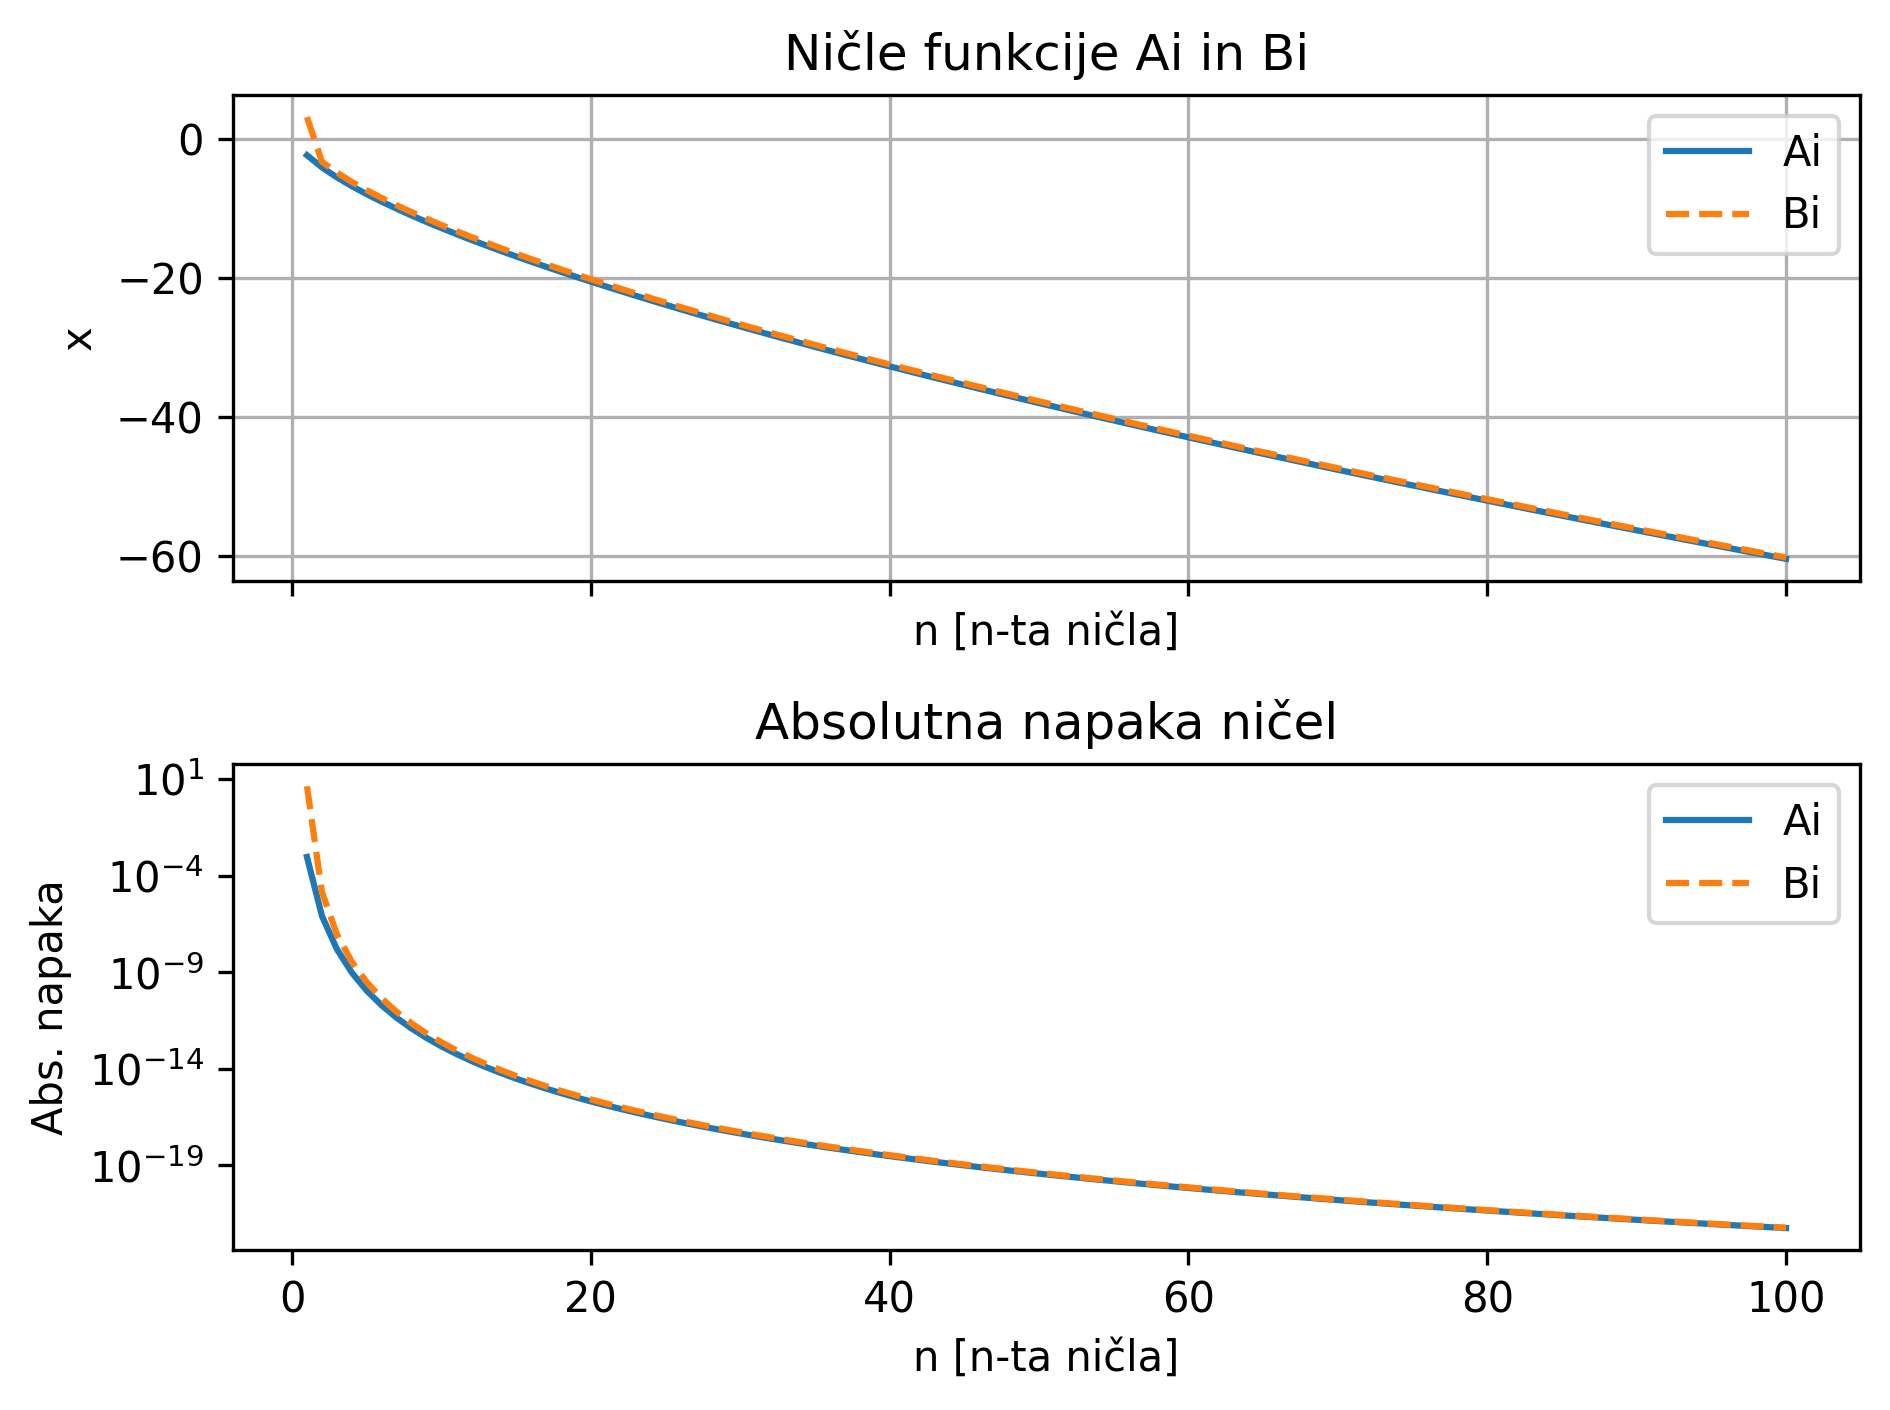

In [34]:

n_range = np.arange(1, 101, 1)
ai_zeros = mp.matrix(1, n_range.size)
bi_zeros = mp.matrix(1, n_range.size)
ai_zeros_ref = mp.matrix(1, n_range.size)
bi_zeros_ref = mp.matrix(1, n_range.size)

for i,n in enumerate(n_range):
    arg_a = fa.zero_arg(int(n), 1)
    arg_b = fa.zero_arg(int(n), 3)
    ai_zeros[i] = -fa.f_zero(arg_a)
    bi_zeros[i] = -fa.f_zero(arg_b)
    ai_zeros_ref[i] = mp.airyaizero(n)
    bi_zeros_ref[i] = mp.airybizero(n)

fix, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('Ničle funkcije Ai in Bi')
ax1.plot(n_range, ai_zeros, label='Ai')
ax1.plot(n_range, bi_zeros, label='Bi', linestyle='--')
ax1.set_ylabel('x')
ax1.set_xlabel('n [n-ta ničla]')
ax1.grid()
ax1.legend()

ax2.set_title('Absolutna napaka ničel')
ax2.plot(n_range, np.abs(ai_zeros - ai_zeros_ref), label='Ai')
ax2.plot(n_range, np.abs(bi_zeros - bi_zeros_ref), label='Bi', linestyle='--')
ax2.legend()
ax2.set_xlabel('n [n-ta ničla]')
ax2.set_ylabel('Abs. napaka')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()


> **Ničle Airyjevih funkcij:** Iz rezultatov potrdimo, da zgornja asimptotska vrsta znotraj intervalov napak ustreza ničlam Airyjevih funkcij. Absolutna napaka se z večanjem $n$ manjša.

## Zaključek

Tekom tega poročila nam je uspelo poiskati učinkovit način za izračun Airyjevih funkcij z absolutno napako manjšo od $10^{-10}$. Tipično število potrebovanih členov vrste je manjše od 25. Potencialne težave imamo le pri funkciji $\text{Bi}$ za velike $x$, saj tam število potrebnih členov izgleda kot da počasi narašča. Vendar v tem območju funkcija presega vrednosti $10^{100}$, tako da se nam doseganje absolutne napake manjše od $10^{-10}$ ne zdi pretirano praktično uporabno. Podoben uspeh smo dosegli tudi za relativno napako manjšo od $10^{-10}$, kjer sta funkciji učinkoviti na celotni realni osi z izjemo okolice $x=4$ pri funkciji $\text{Ai}$. Tam število potrebovanih členov strmo naraste (na več kot 500) za asimptotsko in Maclaurinovo vrsto, posledično v tej okolici za majhno število členov ciljane relativne napake ne dosežemo.

Za konec smo izračunali še prvih 100 ničel obeh Airyjevih funkcij in jih primerjali z asimptotskim razvojem. Pričakovano, se absolutna napaka manjša z manjšanjem $x$ (negativna vrednost) oz. večanjem $n$ (tj. indeksa, ki označuje ničle na negativni polosi). 

---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/01_airy), 2023